# PREDICTING AIRBNB LISTING PRICES IN MELBOURNE

---

## 1. Problem Description and Initial Data Analysis

### **Forecasting Problem**

In this project, our aim is to predict the Airbnb price in Melbourne as accurately as possible. Given the various features and attributes of the listings, we employ different regression machine learning models to achieve this goal. This can be applied to the real-world issue where it is beneficial for many stakeholders. Specifically: 
- **Hosts**: It can assist hosts in establishing competitive prices for their listings.
- **Guests**: Guests can take advantage of this model to make informed decisions regarding Airbnb selection.
- **Business**: The business can drive market insights to optimise its pricing strategies, improving customer satisfaction and boosting business profitability.


### **Evaluation Criteria**

The Root Mean Square Error (RMSE) is utilised to evaluate the performance of the predictive model. It quantifies the average of residuals of the predicted values and actual price values in the test dataset. The formula is presented below:

<center> 
$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{y}_i\right)^2}$
</center> 

- $n$ is the number of observations
- $y_i$ is the actual value in the dataset
- $\hat{y}_i$ is the predicted value from the model

Compared to MSE, RMSE is easier to interpret as it is measured in the same unit as the response variable. A lower RMSE indicates a better fit of the model to the data where the predicted values are closer to the actual values and vice versa. 


### **Types of Variables**
There are 60 variables in the test dataset, while the train dataset contains 61 variables, including the target variable 'price'. There are 18 categorical variables, 36 numerical variables and 6 variables which are neither categorical nor numerical.

According to the Pandas dataframe's information output, 18 variables are of datatype float64, 16 variables are of datatype int64, and 27 variables are of datatype object. The target price variable is currently in object format, indicating the need to convert it to a numeric type for modelling purposes.

Furthermore, we can explore the meaningfulness of these 27 object variables by conducting feature engineering practices in Task 2 to enhance their explanatory power in the machine learning model. It is notable that the current number of features is quite large, necessitating the implementation of an appropriate feature selection technique in Task 3.


### **Data Summary and Main Data Characteristics**
There are 7000 observations in train data and 3000 observations in test data. Overall, the data is highly skewed with noticeable outliers (Charts 6 & 7). It is important to address these outliers appropriately either by removing them in Task 2 or by standardising the variables in Task 3, especially when fitting the data to regression models that are sensitive to outliers, such as Linear Regression and K-Nearest Neighbours Regression. This implies that employing outlier-robust models like tree-based algorithms or ensembling methods would be beneficial. Moreover, the 'has_availability' variable consistently has a value of 't' in both the train and test data (Charts 4 & 5). This suggests that the feature does not contribute to the model's explanatory power and should be removed in Task 2.


### **Missing Values**
There are a considerable number of missing values in 28 variables of test dataset and 23 variables in train dataset, requiring proper treatment in Task 2. Variables with the highest number of null values are predominantly categorical ones in both datasets (Charts 2 & 3), which means that we need to spend more effort and carefully judge which methods should be used to impute these variables. It can be via mode, mapping ordinal variables, or even using advanced techniques designed for categorical imputation. 

In [1]:
# Import necessary libraries for Task 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Display figures inline within the notebook
%matplotlib inline

#Import the Train Dataset
Train_Data = pd.read_csv('data/train.csv')

#Import the Test Dataset
Test_Data = pd.read_csv('data/test.csv')

In [2]:
# Display the overview information of the Train_Data DataFrame to have a glimpse of the number of variables, their datatypes,
# number of observations in the train dataset
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            7000 non-null   int64  
 1   source                                        7000 non-null   object 
 2   name                                          6999 non-null   object 
 3   description                                   6943 non-null   object 
 4   neighborhood_overview                         5177 non-null   object 
 5   host_name                                     7000 non-null   object 
 6   host_since                                    7000 non-null   object 
 7   host_location                                 5720 non-null   object 
 8   host_about                                    4730 non-null   object 
 9   host_response_time                            7000 non-null   o

In [3]:
# Display the overview information of the Test_Data DataFrame to have a glimpse of the number of variables, their datatypes,
# number of observations in the test dataset
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3000 non-null   int64  
 1   source                                        3000 non-null   object 
 2   name                                          3000 non-null   object 
 3   description                                   2969 non-null   object 
 4   neighborhood_overview                         1576 non-null   object 
 5   host_name                                     3000 non-null   object 
 6   host_since                                    3000 non-null   object 
 7   host_location                                 2230 non-null   object 
 8   host_about                                    1559 non-null   object 
 9   host_response_time                            2263 non-null   o

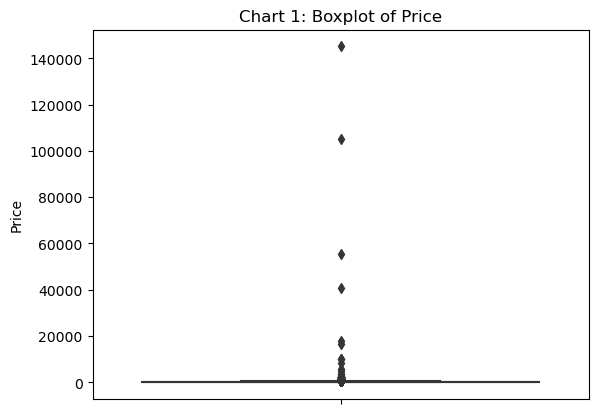

In [4]:
# Clean price variables for observing the distribution of price variable

# `price`: in object datatype (includes '$' before the numbers). Convert it to numerical

Train_Data['price'] = Train_Data['price'].str.replace('$', '', regex=True)
Train_Data['price'] = Train_Data['price'].str.replace(',', '', regex=True)
Train_Data['price'] = Train_Data['price'].astype(float)

# Box plot for Price, detecting if there are any significant outliers, assisting the process of choosing the robust model in Task 3
sns.boxplot(data=Train_Data, y='price', palette='viridis')

# Set plot labels and title
plt.ylabel('Price')
plt.title('Chart 1: Boxplot of Price')

plt.show()

Total number of missing variables in train data: 23
Total number of missing values in train data: 11828


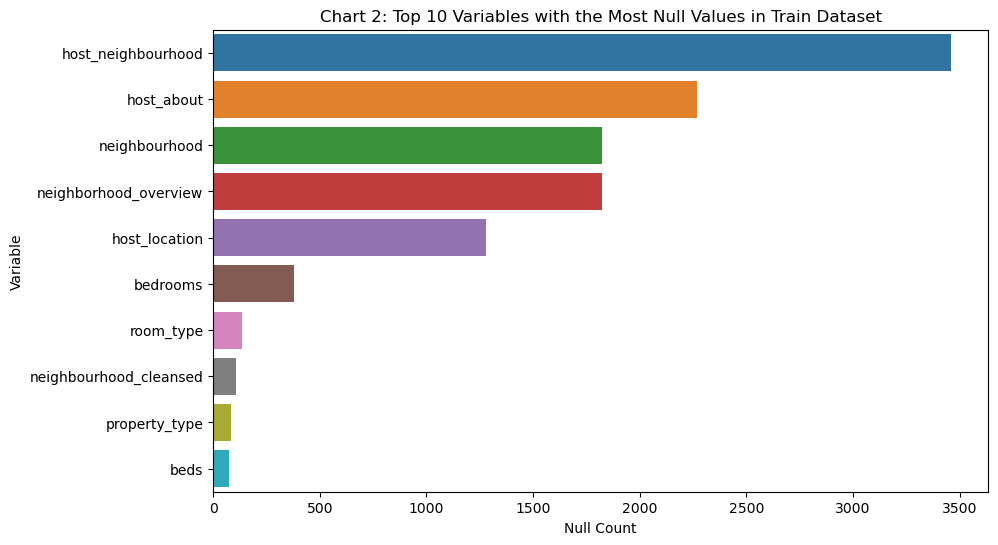

In [5]:
# Calculate the null value counts for each variable in the train dataset:
null_counts_train = Train_Data.isnull().sum()
null_counts_train = null_counts_train[null_counts_train > 0]

# Determine how many variables have missing values and the total of missing values existing in the train dataset
print('Total number of missing variables in train data:', Train_Data.isnull().any().sum())
print('Total number of missing values in train data:', null_counts_train.sum())

# Create a DataFrame to store the variable names and their corresponding null value counts:
null_train_df = pd.DataFrame({'Variable': null_counts_train.index, 'Null Count': null_counts_train.values})

# Sort the DataFrame in descending order based on the null value counts:
null_train_df = (null_train_df.sort_values(by='Null Count', ascending=False))

# Select the top 10 variables with the most null values, indicating the further special treatments for these variables 
# during data cleaning, such as imputation techniques or even removal if they have limited usefulness:
top_10_null_df = null_train_df.head(10)

# Plot the bar chart showing the null value counts for these top 10 variables:
plt.figure(figsize=(10, 6))
sns.barplot(x='Null Count', y='Variable', data=top_10_null_df)
plt.xlabel('Null Count')
plt.ylabel('Variable')
plt.title('Chart 2: Top 10 Variables with the Most Null Values in Train Dataset')
plt.show()

Total number of missing variables in test data: 28
Total number of missing values in test data: 12374


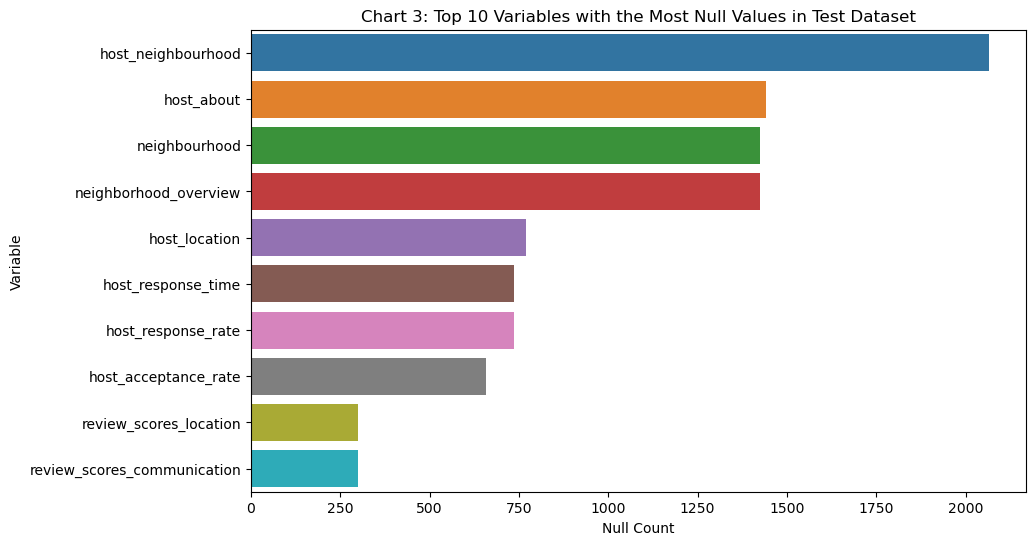

In [6]:
# Calculate the null value counts for each variable in the test dataset:
null_counts_test = Test_Data.isnull().sum()
null_counts_test = null_counts_test[null_counts_test > 0]

#Determine how many variables have missing values and the total of missing values existing in the test dataset
print('Total number of missing variables in test data:', Test_Data.isnull().any().sum()) 
print('Total number of missing values in test data:', null_counts_test.sum())

# Create a DataFrame to store the variable names and their corresponding null value counts:
null_test_df = pd.DataFrame({'Variable': null_counts_test.index, 'Null Count': null_counts_test.values})

# Sort the DataFrame in descending order based on the null value counts:
null_test_df = (null_test_df.sort_values(by='Null Count', ascending=False))

# Select the top 10 variables with the most null values, indicating the further special treatments for these variables
# during data cleaning, such as imputation techniques or even removal if they have limited usefulness:
top_10_null_df = null_test_df.head(10)

# Plot the bar chart showing the null value counts for these top 10 variables:
plt.figure(figsize=(10, 6))
sns.barplot(x='Null Count', y='Variable', data=top_10_null_df)
plt.xlabel('Null Count')
plt.ylabel('Variable')
plt.title('Chart 3: Top 10 Variables with the Most Null Values in Test Dataset')
plt.show()

In [7]:
# Filter categorical columns if they have the 'object' type
categorical_columns = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                       'property_type', 'room_type', 'has_availability', 'instant_bookable']

# Calculate mode for each categorical column, assisting the Data Cleaning step for imputing the missing values for corresponding categorical variables in Task 2
mode_table = Train_Data[categorical_columns].mode().T

# Rename the mode_table columns
mode_table.columns = ['Mode']

# Display the mode table
display(mode_table)

,Mode
host_response_time,within an hour
host_is_superhost,f
host_has_profile_pic,t
host_identity_verified,t
property_type,Entire rental unit
room_type,Entire home/apt
has_availability,t
instant_bookable,f


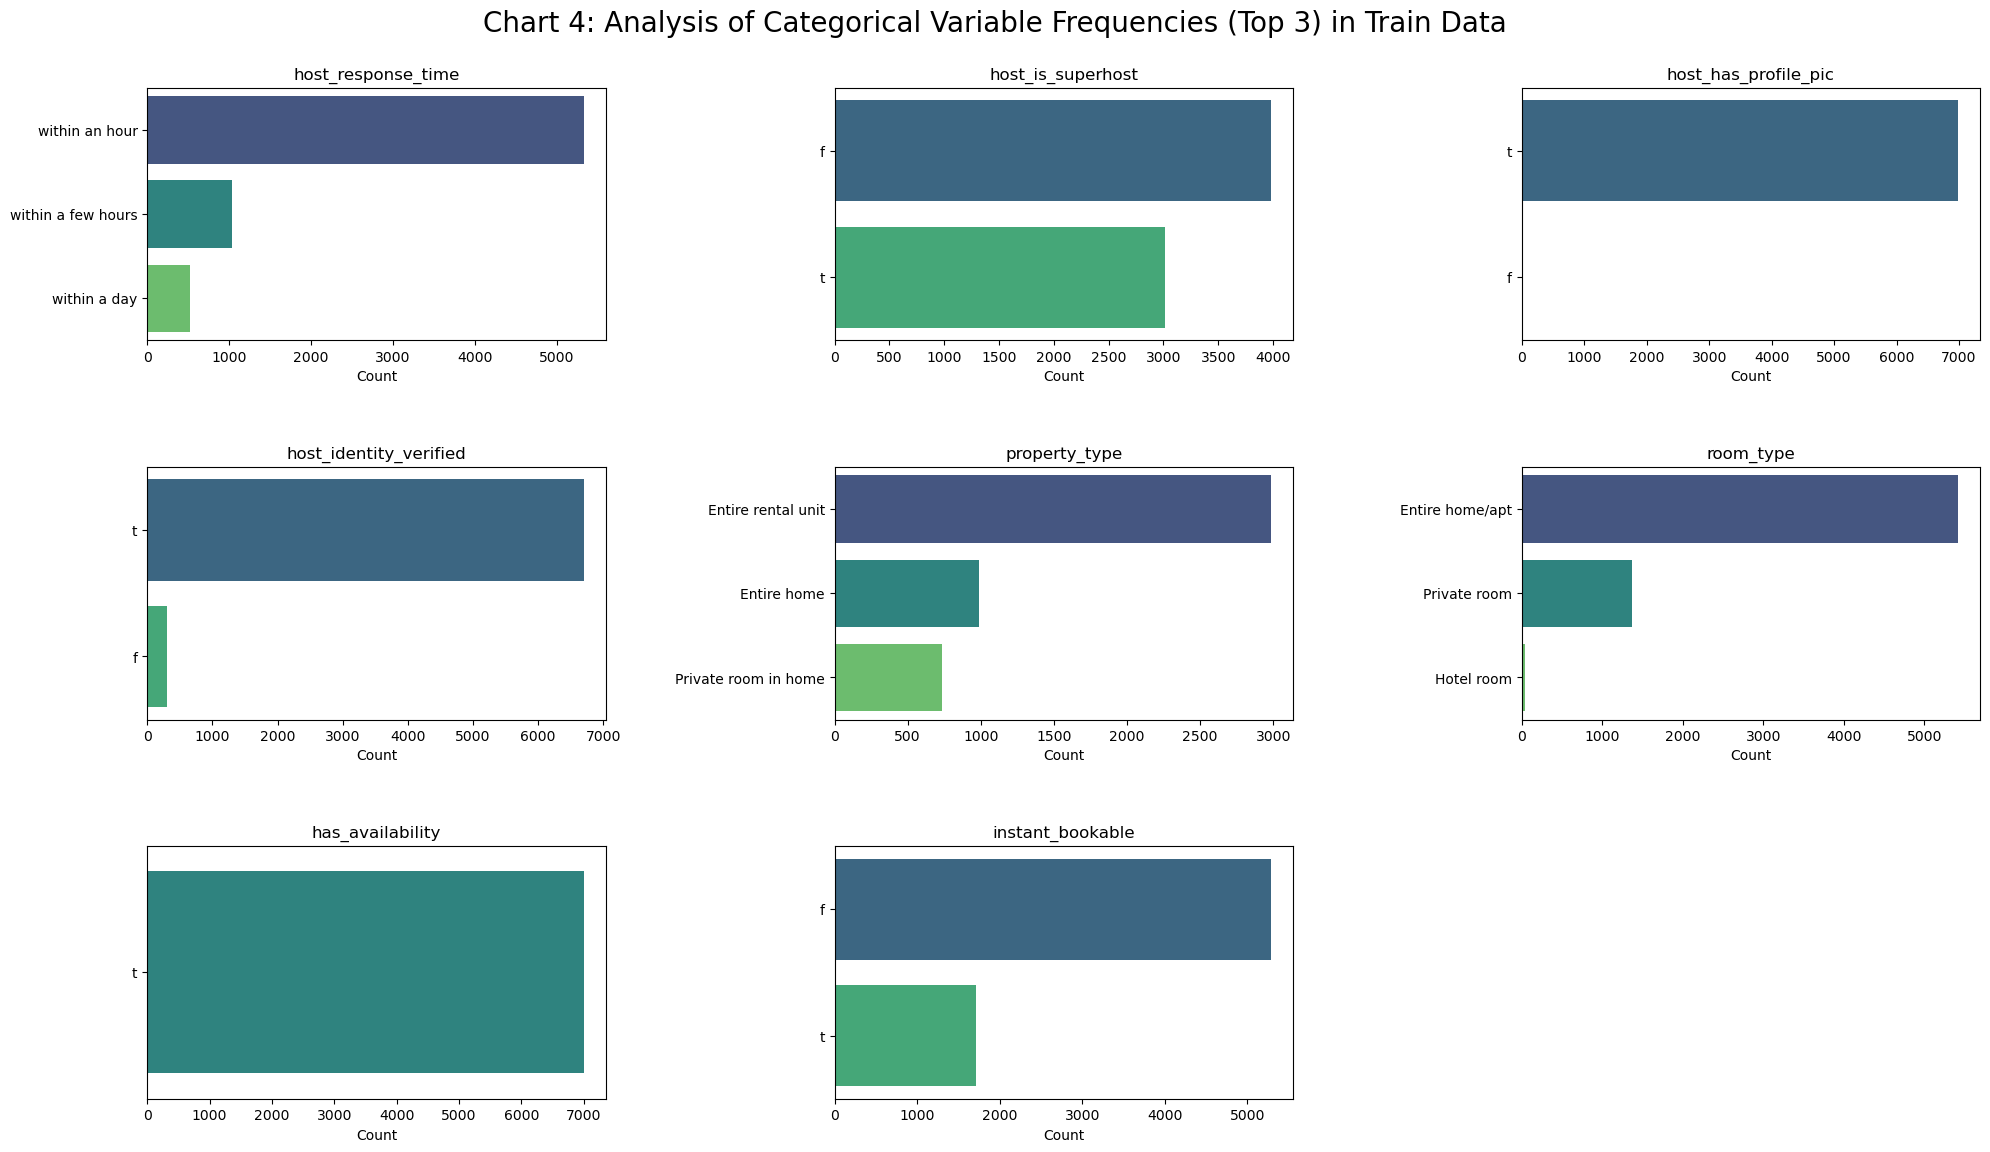

In [8]:
# Set the number of rows and columns for the subplot grid
num_rows = len(categorical_columns)
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle('Chart 4: Analysis of Categorical Variable Frequencies (Top 3) in Train Data', fontsize = 20, y = 1)

# Iterate through categorical variables
for i, variable in enumerate(categorical_columns):
    # Get the top 3 values for the variable in train dataset
    top_values = Train_Data[variable].value_counts().nlargest(3)
    
    # Plot bar chart for top values for these categorical variables in train dataset
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x=top_values.values, y=top_values.index, ax=ax, palette = 'viridis')
    ax.set_title(variable)
    ax.set_xlabel('Count')

# Remove empty subplots
if num_cols * num_rows > len(categorical_columns):
    for i in range(len(categorical_columns), num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

# Adjusts the layout of subplots to prevent overlapping and visually separated
fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plots
plt.show()

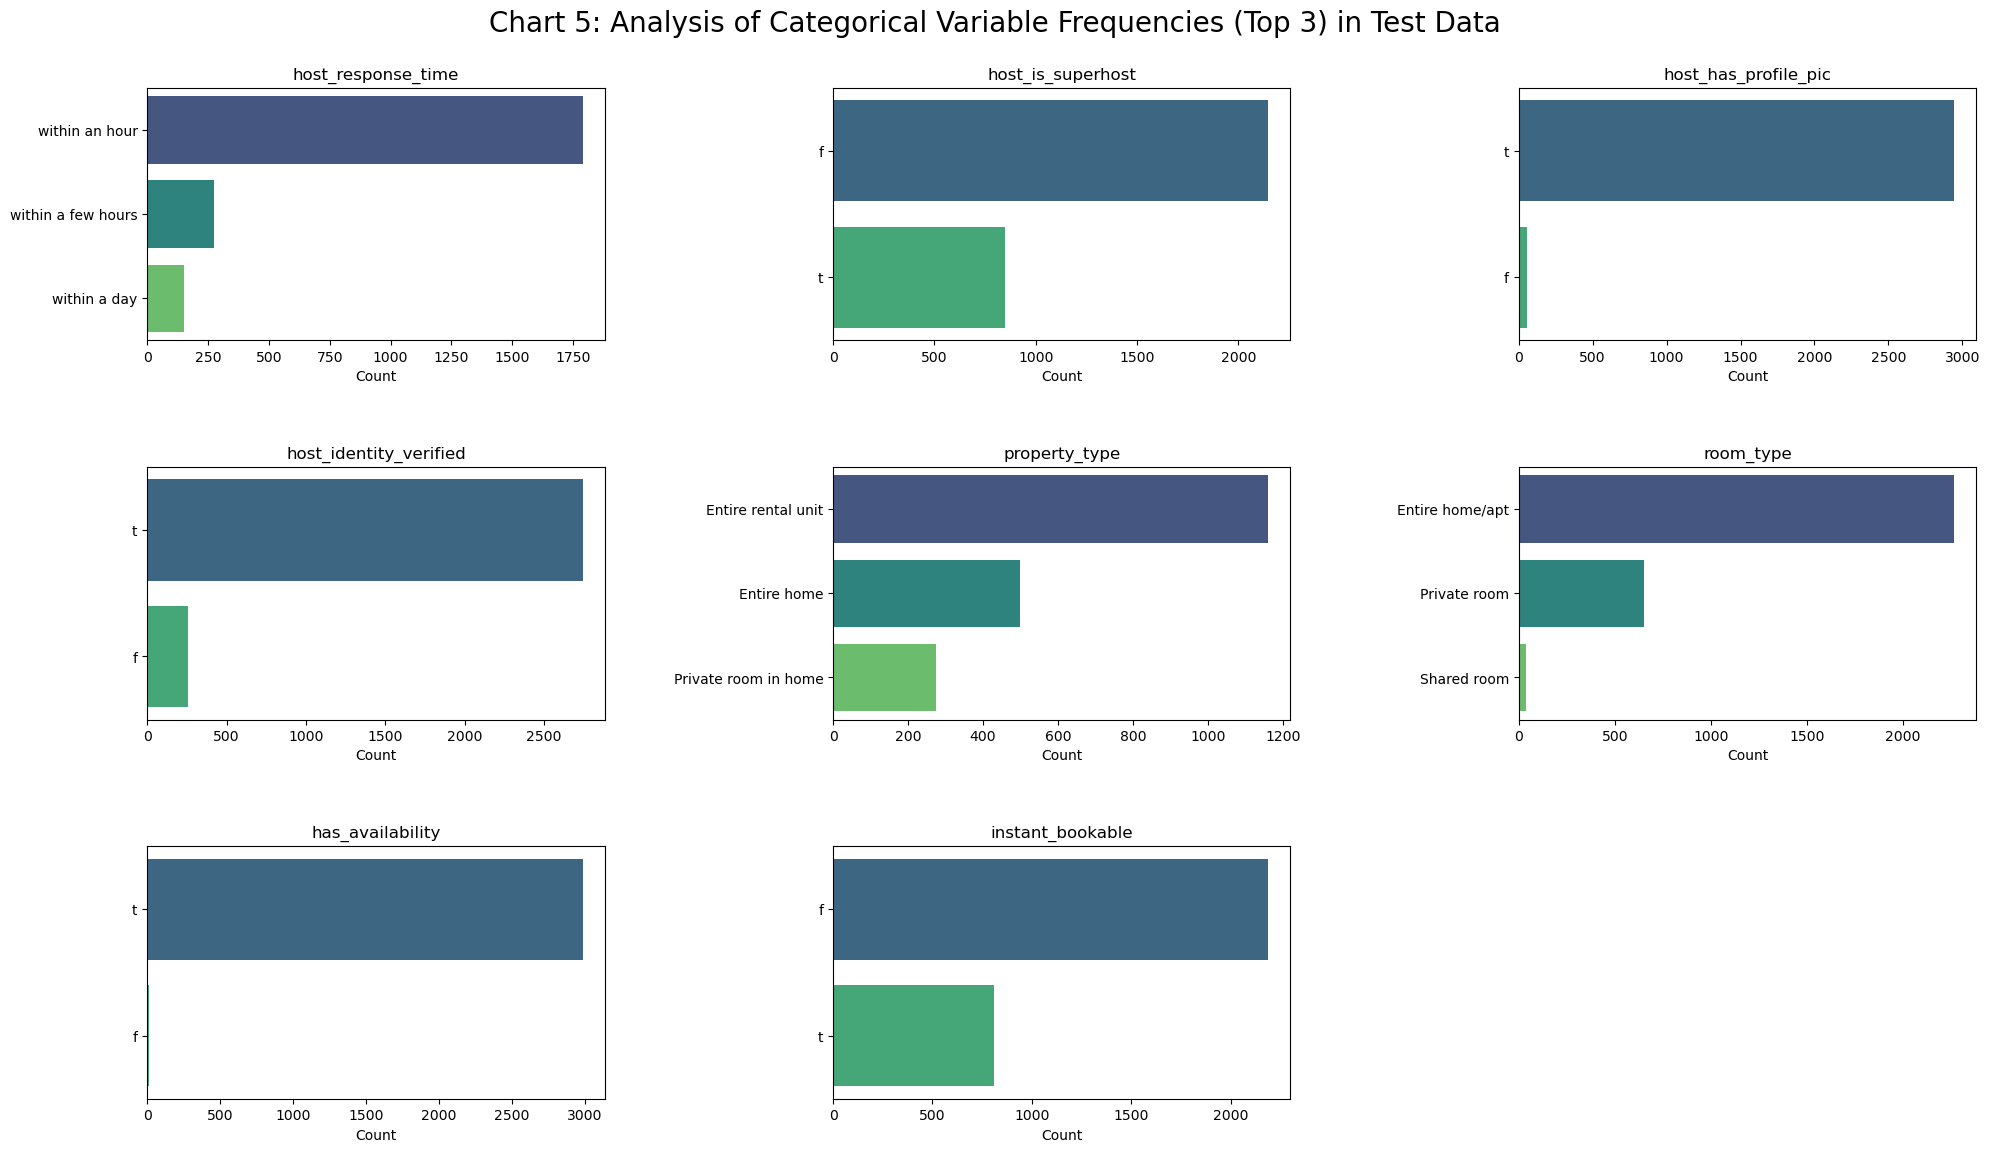

In [9]:
# Set the number of rows and columns for the subplot grid
num_rows = len(categorical_columns)
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle('Chart 5: Analysis of Categorical Variable Frequencies (Top 3) in Test Data', fontsize = 20, y = 1)

# Iterate through categorical variables
for i, variable in enumerate(categorical_columns):
    # Get the top 3 values for the variable in test dataset
    top_values = Test_Data[variable].value_counts().nlargest(3)
    
    # Plot bar chart for top values for these categorical variables in test dataset
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x=top_values.values, y=top_values.index, ax=ax, palette = 'viridis')
    ax.set_title(variable)
    ax.set_xlabel('Count')

# Remove empty subplots
if num_cols * num_rows > len(categorical_columns):
    for i in range(len(categorical_columns), num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

# Adjusts the layout of subplots to prevent overlapping and visually separated
fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plots
plt.show()

In [10]:
# Define the important variables to include in the summary statistics. These variables are selected from the feature selection method in Task 3, 
# they are chosen to represent another numerical variables in the train data. This is done just for a clearer visualisation purpose.
important_variables = ['beds','bedrooms','review_scores_value','availability_60','accommodates','number_of_reviews']

# Generate the summary statistics for Train_Data to have an overview of the columns in the dataset, 
# display mean, median value for imputing the missing values in Task 2 for Train Data if applicable. 
Train_Data[important_variables].describe()

,beds,bedrooms,review_scores_value,availability_60,accommodates,number_of_reviews
count,6928.000000,6622.000000,6978.000000,7000.000000,7000.000000,7000.000000
mean,2.263568,1.785865,4.681164,27.485143,3.839714,68.265429
std,1.783209,1.056360,0.358105,18.720145,2.514657,83.903280
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,4.600000,11.000000,2.000000,13.000000
50%,2.000000,1.000000,4.760000,29.000000,4.000000,38.000000
75%,3.000000,2.000000,4.880000,43.000000,5.000000,92.000000
max,22.000000,14.000000,5.000000,60.000000,16.000000,836.000000


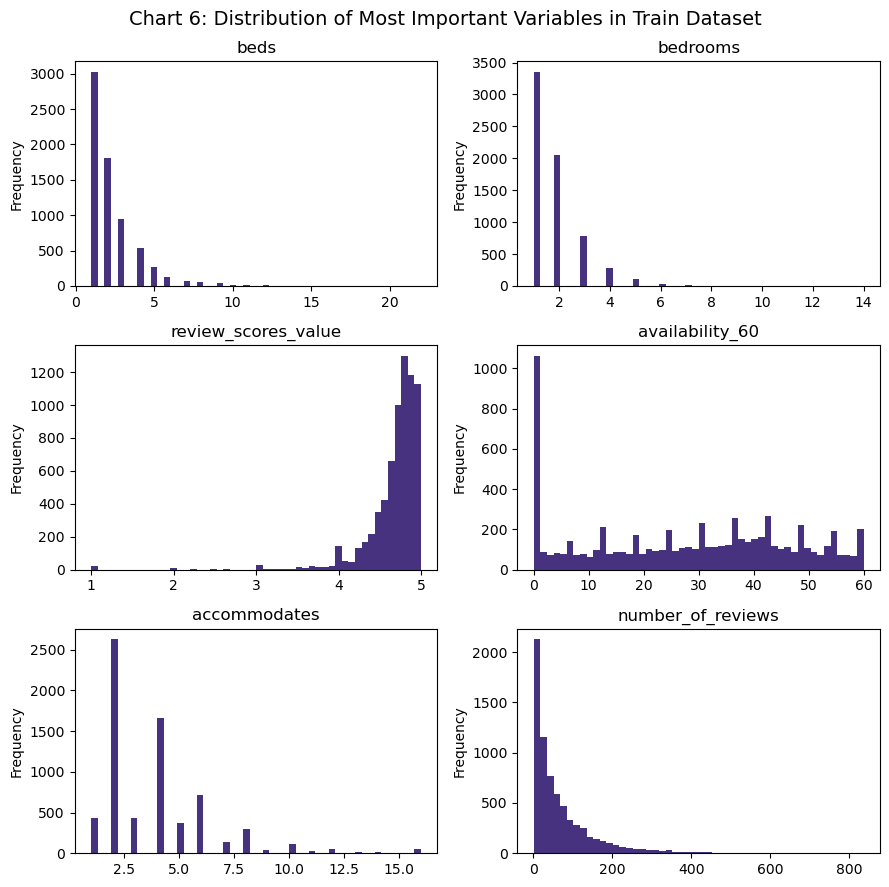

In [11]:
# Set the number of rows and columns for the subplot grid
num_cols = 2
num_rows = len(important_variables) // num_cols

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9,9))

fig.suptitle('Chart 6: Distribution of Most Important Variables in Train Dataset', fontsize = 14)

# Define the color palette
palette = sns.color_palette('viridis')

# Iterate over the numerical columns and create charts for observing the distribution of these variables, determining which variables need feature scaling for 
# non-robust regression model for Task 3, and if there is a need to remove outliers in Task 2. 
for i, column in enumerate(important_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    Train_Data[column].plot.hist(ax=ax, color=palette, bins=50)
    ax.set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [12]:
# Generate the summary statistics for Test_Data variables to have an overview of the columns in the dataset, 
# display mean, median value for imputing the missing values in Task 2 for Test Data if applicable. 
Test_Data[important_variables].describe()

,beds,bedrooms,review_scores_value,availability_60,accommodates,number_of_reviews
count,2988.000000,2940.000000,2700.000000,3000.000000,3000.000000,3000.000000
mean,2.169009,1.812585,4.626874,25.104667,3.851000,17.850333
std,1.482365,1.040803,0.488367,20.930068,2.448019,24.658317
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,4.500000,0.000000,2.000000,3.000000
50%,2.000000,2.000000,4.750000,27.000000,4.000000,10.000000
75%,3.000000,2.000000,4.920000,43.000000,5.000000,24.000000
max,12.000000,8.000000,5.000000,60.000000,16.000000,334.000000


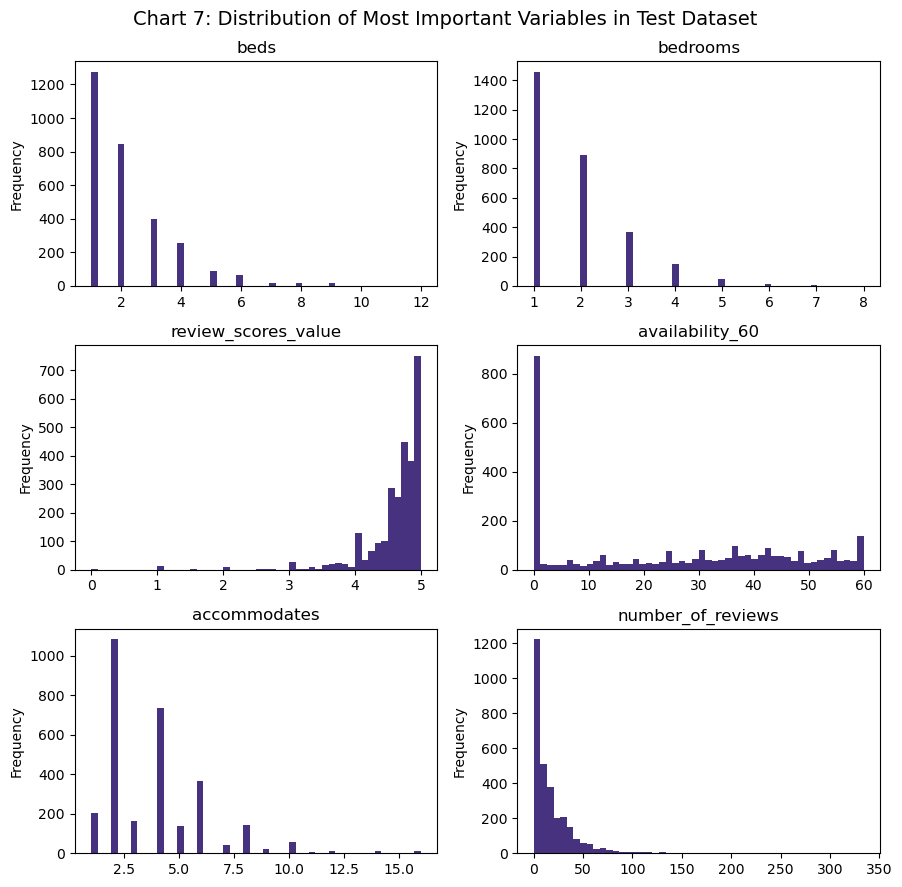

In [13]:
# Set the number of rows and columns for the subplot grid
num_cols = 2
num_rows = len(important_variables) // num_cols

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9,9))

fig.suptitle('Chart 7: Distribution of Most Important Variables in Test Dataset', fontsize = 14)

# Define the color palette
palette = sns.color_palette('viridis')

# Iterate over the numerical columns and create charts for observing the distribution of these variables, determining which variables need feature scaling for 
# non-robust regression model for Task 3, and if there is a need to remove outliers in Task 2. 
for i, column in enumerate(important_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    Test_Data[column].plot.hist(ax=ax, color=palette, bins=50)
    ax.set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

### Cleaning `host_response_rate` and `host_acceptance_rate`

For both `host_response_rate` and `host_acceptance_rate`, the rates in both training and testing datasets are displayed as percentage and are in string (`object`) data type. Ideally, we would want to convert the data type into `float` and displayed as decimal points. Therefore, in order to clean those two variables, we have to:
1. Delete the '%' sign in the string to only get the number in the string.
2. Convert the data type of those features into float.
3. Display the values as decimal points by dividing the value by 100.

In [14]:
#Import necessary libraries for Task 2 
from sklearn.preprocessing import MultiLabelBinarizer
import datetime
from datetime import datetime, date
import re
from sklearn.linear_model import LinearRegression
# pip install geopy
from geopy.geocoders import Nominatim
import warnings
import csv
warnings.filterwarnings('ignore')

In [15]:
### CLEANING `host_response_rate`

## ------------------------------------------ TRAIN DATASET --------------------------------------------------------------
# Deleting the '%' in the string
Train_Data['host_response_rate'] = Train_Data['host_response_rate'].str.strip('%')
# Converting the feature into `float` datatype
Train_Data['host_response_rate'] = Train_Data['host_response_rate'].astype(float)
# Converting the feature into decimal points
Train_Data['host_response_rate'] = Train_Data['host_response_rate']/100

## ------------------------------------------ TEST DATASET --------------------------------------------------------------
# Deleting the '%' in the string
Test_Data['host_response_rate'] = Test_Data['host_response_rate'].str.strip('%')
# Converting the feature into `float` datatype
Test_Data['host_response_rate'] = Test_Data['host_response_rate'].astype(float)
# Converting the feature into decimal points
Test_Data['host_response_rate'] = Test_Data['host_response_rate']/100

In [16]:
### CLEANING `host_acceptance_rate`

## ------------------------------------------ TRAIN DATASET --------------------------------------------------------------
# Deleting the '%' in the string
Train_Data['host_acceptance_rate'] = Train_Data['host_acceptance_rate'].str.strip('%')
# Converting the feature into `float` datatype
Train_Data['host_acceptance_rate'] = Train_Data['host_acceptance_rate'].astype(float)
# Converting the feature into decimal points
Train_Data['host_acceptance_rate'] = Train_Data['host_acceptance_rate']/100

## ------------------------------------------ TEST DATASET --------------------------------------------------------------
# Deleting the '%' in the string
Test_Data['host_acceptance_rate'] = Test_Data['host_acceptance_rate'].str.strip('%')
# Converting the feature into `float` datatype
Test_Data['host_acceptance_rate'] = Test_Data['host_acceptance_rate'].astype(float)
# Displaying the feature into decimal points
Test_Data['host_acceptance_rate'] = Test_Data['host_acceptance_rate']/100

### Cleaning `price`

For feature `price`, the prices in the training dataset are in the string (`object`) data type as it includes the dollar sign as well as the delimiter (','). Ultimately, we would want to get rid of all of the symbols and convert the texts to numbers and convert the feature into a numerical data type (`float`). For example, '$1,000' would be changed into '1000'. In order to achieve this, we will:
1. Delete the dollar sign.
2. Delete the delimiter (',').
3. Change the data type of the feature from `object` to `float`.

In [17]:
# # Deleting the '$' in the string
# Train_Data['price'] = Train_Data['price'].str.replace('$', '', regex=True)
# # Deleting the ',' delimiter in the string
# Train_Data['price'] = Train_Data['price'].str.replace(',', '', regex=True)
# # Change the data type to `float`
# Train_Data['price'] = Train_Data['price'].astype(float)

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

### Create new features from `bathrooms`

The feature `bathrooms` is currently in string (`object`) data type and is inconsistent among observations. There are multiple pieces of information we can get from the variable `bathrooms`:
- **The number of bathrooms in the Airbnb listing**: This new feature is created by extracting the numbers appearing at the start of the texts. The data type of the feature is converted from string (`object`) to `float` because some numbers also contain decimal points (for example, 1.5). If there are no numbers, we will impute the number of bathrooms by the average (mean) number of bathrooms in the training dataset.
- **Whether the listing includes half-baths (only toilet, no shower/bathtub)**: This is a binary categorical variable whose possible values are '0' (does not include half-bath) and '1' (includes half-bath). If the original text specifies that there are half-baths (i.e, the original text contains the word 'half-bath'), it means the listing includes half-baths. Furthermore, if the number of bathrooms contains .5 (for example, 1.5), we will assume that the listing includes half-baths. In the code below, we will convert the result achieved from applying these conditions from `boolean` data type to `int` data type to encode it binarily.
- **Whether the bathrooms are for share or for private use**: A feature called `shared_bathroom` is created to indicate whether the bathrooms are for share or for private use. It is also a binary categorical variable whose values are encoded as '0' (private bathrooms) and '1' (shared bathrooms). This is achieved by checking whether it is specified in the original text that the bathrooms are for share (i.e, the original text contains the word 'shared') - if the text does not specify or if it contains the word 'private', we will assume that the bathrooms are private. In the code below, we will convert the result achieved from applying these conditions from `boolean` data type to `int` data type to encode it binarily.

The `bathrooms` feature is then removed from the dataset once all information has been extracted. This process is done on both the training and testing datasets in order to ensure conformity and accuracy. 

In [18]:
## ------------------------------------------ TRAIN DATASET --------------------------------------------------------------
# Extracting the number of bathrooms
Train_Data['num_bathrooms'] = Train_Data['bathrooms'].str.extract('(\d*\.?\d+)')
# Converting the variable into type 'float'
Train_Data['num_bathrooms'] = Train_Data['num_bathrooms'].astype(float)
# Imputing missing values with the average number of bathrooms
Train_Data['num_bathrooms'].fillna(Train_Data['num_bathrooms'].mean(axis=0), inplace = True)

# Creating the 'half-bath' variable and encoding it binarily
Train_Data['half_bath'] = ((Train_Data['num_bathrooms'] % 1 == 0.5) | Train_Data['bathrooms'].str.contains('half-bath', case=False)).astype(int)

# Creating the 'shared_bathroom' variable
Train_Data['shared_bathroom'] = Train_Data['bathrooms'].str.contains('shared', case=False)
# If the information is not specified, assume the bathrooms are private
Train_Data['shared_bathroom'].fillna(False, inplace = True)
# Encoding the variable binarily
Train_Data['shared_bathroom'] = Train_Data['shared_bathroom'].astype(int)

# Dropping the 'bathrooms' column
Train_Data.drop('bathrooms', axis=1, inplace=True)

## ------------------------------------------ TEST DATASET --------------------------------------------------------------
# Extracting the number of bathrooms
Test_Data['num_bathrooms'] = Test_Data['bathrooms'].str.extract('(\d*\.?\d+)')
# Converting the variable into type 'float'
Test_Data['num_bathrooms'] = Test_Data['num_bathrooms'].astype(float)
# Imputing missing values with the average number of bathrooms
Test_Data['num_bathrooms'].fillna(Test_Data['num_bathrooms'].mean(axis=0), inplace = True)

# Creating the 'half-bath' dummy variable
Test_Data['half_bath'] = ((Test_Data['num_bathrooms'] % 1 == 0.5) | Test_Data['bathrooms'].str.contains('half-bath', case=False)).astype(int)

# Creating the 'shared_bathroom' variable
Test_Data['shared_bathroom'] = Test_Data['bathrooms'].str.contains('shared', case=False)
# If the information is not specified, assume the bathrooms are private
Test_Data['shared_bathroom'].fillna(False, inplace = True)
# Encoding the variable binarily
Test_Data['shared_bathroom'] = Test_Data['shared_bathroom'].astype(int)

# Dropping the 'bathrooms' column
Test_Data.drop('bathrooms', axis=1, inplace=True)

### Create new features from `host_verifications`

For both training and testing datasets, currently, the feature `host_verifications` contains a number of host verification methods separated by commas. Each host verification method is specified within apostrophes (' '), and all host verification methods for that listing is combined within square brackets ([ ]) (for example: ['email', 'phone']). Essentially, we would want to extract each of the host verification methods and create dummy variables indicating whether that method is applicable for that listing. This is achieved by:
1. Converting each entry of `host_verifications` into a `list` by parsing the strings using the `eval` function on each row of the dataset.
2. Passing each instance of `host_verifications` to `MultiLabelBinarizer()` to encode multiple labels (in this case, host verification methods)per instance. To translate and interpret the results, a new DataFrame is created with the combined array output, and the column names would be the encoded classes (i.e, each host verification method, accessed through the `classes_` attribute).
3. Finally, now that we have extracted all necessary information from the feature `host_verifications`, we will drop that column to reduce redundancy.

This process is done on both the training and testing datasets to ensure conformity and accuracy.

In [19]:
## ------------------------------------------ TRAIN DATASET --------------------------------------------------------------
# For each row, parsing the strings and converting each entry into a list
Train_Data['host_verifications'] = Train_Data['host_verifications'].apply(lambda x: eval(x))
# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# Apply the MultiLabelBinarizer on the column of lists
train_host_verifications = pd.DataFrame(mlb.fit_transform(Train_Data['host_verifications']), columns=mlb.classes_)
# Concatenate the original DataFrame with the encoded DataFrame
Train_Data = pd.concat([Train_Data, train_host_verifications], axis=1)
# Drop the original column
Train_Data = Train_Data.drop('host_verifications', axis=1)

## ------------------------------------------ TEST DATASET --------------------------------------------------------------
# For each row, parsing the strings and converting each entry into a list
Test_Data['host_verifications'] = Test_Data['host_verifications'].apply(lambda x: eval(x))
# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# Apply the MultiLabelBinarizer on the column of lists
test_host_verifications = pd.DataFrame(mlb.fit_transform(Test_Data['host_verifications']), columns=mlb.classes_)
# Concatenate the original DataFrame with the encoded DataFrame
Test_Data = pd.concat([Test_Data, test_host_verifications], axis=1)
# Drop the original column
Test_Data = Test_Data.drop('host_verifications', axis=1)

### Create new features from `amenities`

Like `host_verifications`, for both training and testing datasets, the feature `amenities` contains a number of amenities separated by commas. Each amenity is specified within quotation marks (" "), and all amenities for that listing is combined within square brackets ([ ]) (for example: ["Sukin conditioner", "Extra pillows and blankets"]). Essentially, we would want to extract each amenity and create dummy variables indicating whether that amenity is available for that listing. This is achieved by:
1. Converting each entry of `amenities` into a list by parsing the strings using the `eval` function on each row of the dataset.
2. Passing each instance of `amenities` to `MultiLabelBinarizer()` to encode multiple labels (in this case, amenities) per instance. To translate and interpret the results, a new DataFrame is created with the combined array output, and the column names would be the encoded classes (i.e, each amenity, accessed through the `classes_` attribute).
3. Calculating the number of amenities each Airbnb listing has. Since amenities are now encoded binarily, the sum of the values for all amenities in each row is also the number of amenities available in each Airbnb listing.
4. Finally, now that we have extracted all necessary information from the feature `amenities`, we will drop that column to reduce redundancy.

In [20]:
## ------------------------------------------ TRAIN DATASET --------------------------------------------------------------
# For each row, parsing the strings and converting each entry into a list
Train_Data['amenities'] = Train_Data['amenities'].apply(lambda x: eval(x))

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply the MultiLabelBinarizer on the column of lists
df_encoded = pd.DataFrame(mlb.fit_transform(Train_Data['amenities']), columns=mlb.classes_)

# Concatenate the original DataFrame with the encoded DataFrame
Train_Data = pd.concat([Train_Data, df_encoded], axis=1)

# Count the number of amenities each listing has
Train_Data['count_amenities'] = Train_Data[df_encoded.columns].sum(axis=1)

# Drop the original column
Train_Data = Train_Data.drop('amenities', axis=1)

In [21]:
## ------------------------------------------ TEST DATASET --------------------------------------------------------------
Test_Data['amenities'] = Test_Data['amenities'].apply(lambda x: eval(x))

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply the MultiLabelBinarizer on the column of lists
df_amenities = pd.DataFrame(mlb.fit_transform(Test_Data['amenities']), columns=mlb.classes_)

# Concatenate the original DataFrame with the encoded DataFrame
Test_Data = pd.concat([Test_Data, df_amenities], axis=1)

# Count the number of amenities each listing has
Test_Data['count_amenities'] = Test_Data[df_amenities.columns].sum(axis=1)

# Drop the original column
Test_Data = Test_Data.drop('amenities', axis=1)

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

### Impute missing values on the training dataset

In [22]:
# Calculate the number of missing values for each feature
null_sum_series = Train_Data.isnull().sum()
# Convert the series into a dataframe, with the calculated results under 'Number of missing values' column
null_sum_df = null_sum_series.to_frame('Number of missing values')
# Condition to only display the names of the columns with missing values (i.e, number of missing values > 0)
display_null = null_sum_df.loc[null_sum_df['Number of missing values'] > 0]
# Display the result
display_null

,Number of missing values
name,1
description,57
neighborhood_overview,1823
host_location,1280
host_about,2270
host_acceptance_rate,63
host_neighbourhood,3460
neighbourhood,1823
neighbourhood_cleansed,108
property_type,84


The output above shows the number of missing values for each feature in the training dataset. We are only displaying the variables with missing values.

For numerical variables (`host_acceptance_rate`, `bedrooms`, `beds`, `minimum_minimum_nights`, `maximum_maximum_nights`, `availability_365`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location` and `review_scores_value`), we will impute the missing values with the mean value of that column in the training dataset.

In [23]:
# Impute 'host_acceptance_rate'
Train_Data['host_acceptance_rate'].fillna(Train_Data['host_acceptance_rate'].mean(axis=0), inplace=True)
# Impute 'bedrooms'
Train_Data['bedrooms'].fillna(Train_Data['bedrooms'].mean(axis=0), inplace=True)
# Impute 'beds'
Train_Data['beds'].fillna(Train_Data['beds'].mean(axis=0), inplace=True)
# Impute 'minimum_minimum_nights'
Train_Data['minimum_minimum_nights'].fillna(Train_Data['minimum_minimum_nights'].mean(axis=0), inplace=True)
# Impute 'maximum_maximum_nights'
Train_Data['maximum_maximum_nights'].fillna(Train_Data['maximum_maximum_nights'].mean(axis=0), inplace=True)
# Impute 'availability_365'
Train_Data['availability_365'].fillna(Train_Data['availability_365'].mean(axis=0), inplace=True)
# Impute 'review_scores_accuracy'
Train_Data['review_scores_accuracy'].fillna(Train_Data['review_scores_accuracy'].mean(axis=0), inplace=True)
# Impute 'review_scores_cleanliness'
Train_Data['review_scores_cleanliness'].fillna(Train_Data['review_scores_cleanliness'].mean(axis=0), inplace=True)
# Impute 'review_scores_checkin'
Train_Data['review_scores_checkin'].fillna(Train_Data['review_scores_checkin'].mean(axis=0), inplace=True)
# Impute 'review_scores_communication'
Train_Data['review_scores_communication'].fillna(Train_Data['review_scores_communication'].mean(axis=0), inplace=True)
# Impute 'review_scores_location'
Train_Data['review_scores_location'].fillna(Train_Data['review_scores_location'].mean(axis=0), inplace=True)
# Impute 'review_scores_value'
Train_Data['review_scores_value'].fillna(Train_Data['review_scores_value'].mean(axis=0), inplace=True)

For categorical variables (`host_location`, `host_neighbourhood`, `property_type` and `room_type`), the only available method (out of the 3 methods - mean/mode/median) to impute missing values is using the mode of that feature in the training dataset. 

In [24]:
# Impute 'host_location'
Train_Data['host_location'].fillna(Train_Data['host_location'].mode()[0], inplace=True)
# Impute 'host_neighbourhod'
Train_Data['host_neighbourhood'].fillna(Train_Data['host_neighbourhood'].mode()[0], inplace=True)
# Impute 'property_type'
Train_Data['property_type'].fillna(Train_Data['property_type'].mode()[0], inplace=True)
# Impute 'room_type'
Train_Data['room_type'].fillna(Train_Data['room_type'].mode()[0], inplace=True)

`neighbourhood` is also a categorical variable. However, instead of using mode, we will impute the missing values for this feature a bit differently to increase the accuracy of the neighbourhood location.
1. The `geopy` library, a Python client used to access geocoding web services, is installed, from which we will import `Nominatim` geolocation service (API).
2. For each of the listing in the dataset, we will pass to the geolocation service its `latitude` and `longitude` (which are not null) so that it can find the location of the listing.
3. Since `location` is stored as `location` data type, to extract the neighbourhood information from `location`, we have to get the address of the location (stored as `string`) through its attribute `address`.
4. As the address has commas separating different information about the location (country/state/city/street/suburb/postal code) (for example: '87, Charles Street, Abbotsford, Melbourne, City of Yarra, Victoria, 3067, Australia'), we need to parse the address to convert the `string` to a `list`.
5. Some addresses also specify the building/house number. To keep the format and length of the list consistent among addresses, we will only keep the last 7 pieces of information in the list, containing street name, suburb, city, local government area, state, postal code, country (for example: 'Charles Street, Abbotsford, Melbourne, City of Yarra, Victoria, 3067, Australia').
6. Extract the neighbourhood (suburb) item from the list, which is placed second from the start of the list and append it to a list of neighbourhoods.
7. Change values of the column `neighbourhood` to `neighborhood_list`.

We will also impute missing values under `neighbourhood_cleansed` with their corresponding values in `neighbourhood`.

In [25]:
# install 'geopy' library
#!pip install geopy

In [26]:
# **THIS TAKES A WHILE TO RUN SO PLEASE IMPORT THE .CSV FILE PROVIDED AS A SHORTCUT**

# import library
# import geopy
# import Nominatim geolocation service
# from geopy.geocoders import Nominatim
# Initialize the geolocator
# geolocator = Nominatim(user_agent="my-app")
# Create a list containing neighbourhoods of each row
# neighborhood_list = []

# For each row, pass the latitude and longitude of the listing to the geolocator
# for latitude, longitude in zip(Train_Data['latitude'], Train_Data['longitude']):
#     Get the location of the listing
#     location = geolocator.reverse(f"{latitude}, {longitude}")
#     Access the address of the location and parse the string to get a list of information
#     address = location.address.split(", ")
#     Only retain the last 7 pieces of information to ensure consistency among addresses
#     address = address[-7:]
#     Access the neighbourhood item within the list and add it to the list of neighbourhoods
#     neighborhood_list.append(address[1])
#     Check the progress of the code
#     print(len(neighborhood_list))

# Values within 'neighborhood_list' is now the new values for the 'neighbourhood' column
# Train_Data['neighbourhood'] = neighborhood_list

# Save the generated values to a CSV file to save processing time in future runs of the code
# neighborhood_data = Train_Data['neighbourhood']
# neighborhood_data.to_csv('neighborhood_train.csv', index=False)

In [27]:
# Code used to import 'neighbourhood' values in future runs
Train_Data['neighbourhood'] = pd.read_csv('neighborhood_train.csv')

# Impute missing values under 'neighbourhood_cleansed' with corresponding values in 'neighbourhood'
Train_Data['neighbourhood_cleansed'].fillna(Train_Data['neighbourhood'], inplace=True)

For features that are neither categorical nor numerical (`name`, `description`, `neighborhood_overview`, `host_about`), we will impute missing values with 'N/A'.

In [28]:
# Impute 'name'
Train_Data['name'].fillna('N/A', inplace=True)
# Impute 'description'
Train_Data['description'].fillna('N/A', inplace=True)
# Impute 'neighborhood_overview'
Train_Data['neighborhood_overview'].fillna('N/A', inplace=True)
# Impute 'host_about'
Train_Data['host_about'].fillna('N/A', inplace=True)

### Impute missing values on the testing dataset

In [29]:
# Calculate the number of missing values for each feature
null_sum_series = Test_Data.isnull().sum()
# Convert the series into a dataframe, with the calculated results under 'Number of missing values' column
null_sum_df = null_sum_series.to_frame('Number of missing values')
# Condition to only display the names of the columns with missing values (i.e, number of missing values > 0)
display_null = null_sum_df.loc[null_sum_df['Number of missing values'] > 0]
# Display the result
display_null

,Number of missing values
description,31
neighborhood_overview,1424
host_location,770
host_about,1441
host_response_time,737
host_response_rate,737
host_acceptance_rate,658
host_is_superhost,2
host_neighbourhood,2066
neighbourhood,1424


The output above shows the number of missing values for each feature in the testing dataset. We are only displaying the variables with missing values.

For numerical variables (`host_response_rate`, `host_acceptance_rate`, `bedrooms`, `beds`, `minimum_minimum_nights`, `maximum_maximum_nights`, `availability_365`, `review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value` and `reviews_per_month`), we will impute the missing values with the mean value of that column in the training dataset.

In [30]:
# Impute 'host_response_rate'
Test_Data['host_response_rate'].fillna(Train_Data['host_response_rate'].mean(axis=0), inplace=True)
# Impute 'host_acceptance_rate'
Test_Data['host_acceptance_rate'].fillna(Train_Data['host_acceptance_rate'].mean(axis=0), inplace=True)
# Impute 'bedrooms'
Test_Data['bedrooms'].fillna(Train_Data['bedrooms'].mean(axis=0), inplace=True)
# Impute 'beds'
Test_Data['beds'].fillna(Train_Data['beds'].mean(axis=0), inplace=True)
# Impute 'minimum_minimum_nights'
Test_Data['minimum_minimum_nights'].fillna(Train_Data['minimum_minimum_nights'].mean(axis=0), inplace=True)
# Impute 'maximum_maximum_nights'
Test_Data['maximum_maximum_nights'].fillna(Train_Data['maximum_maximum_nights'].mean(axis=0), inplace=True)
# Impute 'availability_365'
Test_Data['availability_365'].fillna(Train_Data['availability_365'].mean(axis=0), inplace=True)
# Impute 'review_scores_rating'
Test_Data['review_scores_rating'].fillna(Train_Data['review_scores_rating'].mean(axis=0), inplace=True)
# Impute 'review_scores_accuracy'
Test_Data['review_scores_accuracy'].fillna(Train_Data['review_scores_accuracy'].mean(axis=0), inplace=True)
# Impute 'review_scores_cleanliness'
Test_Data['review_scores_cleanliness'].fillna(Train_Data['review_scores_cleanliness'].mean(axis=0), inplace=True)
# Impute 'review_scores_checkin'
Test_Data['review_scores_checkin'].fillna(Train_Data['review_scores_checkin'].mean(axis=0), inplace=True)
# Impute 'review_scores_communication'
Test_Data['review_scores_communication'].fillna(Train_Data['review_scores_communication'].mean(axis=0), inplace=True)
# Impute 'review_scores_location'
Test_Data['review_scores_location'].fillna(Train_Data['review_scores_location'].mean(axis=0), inplace=True)
# Impute 'review_scores_value'
Test_Data['review_scores_value'].fillna(Train_Data['review_scores_value'].mean(axis=0), inplace=True)
# Impute 'reviews_per_month'
Test_Data['reviews_per_month'].fillna(Train_Data['reviews_per_month'].mean(axis=0), inplace=True)

For categorical variables (`host_location`, `host_response_time`, `host_is_superhost` and `host_neighbourhood`, `property_type` and `room_type`), the only available method (out of the 3 methods - mean/mode/median) to impute missing values is using the mode of that feature in the testing dataset.

In [31]:
# Impute 'host_location'
Test_Data['host_location'].fillna('N/A', inplace=True)
# Impute 'host_response_time'
Test_Data['host_response_time'].fillna(Train_Data['host_response_time'].mode()[0], inplace=True)
# Impute 'host_is_superhost'
Test_Data['host_is_superhost'].fillna(Train_Data['host_is_superhost'].mode()[0], inplace=True)
# Impute 'host_neighbourhood'
Test_Data['host_neighbourhood'].fillna('N/A', inplace=True)
# Impute 'property_type'
Test_Data['property_type'].fillna(Train_Data['property_type'].mode()[0], inplace=True)
# Impute 'room_type'
Test_Data['room_type'].fillna(Train_Data['room_type'].mode()[0], inplace=True)

`neighbourhood` is also a categorical variable, and in order to ensure conformity and consistency between the training and testing datasets, we will impute missing values for `neighbourhood` in the testing dataset the same as the way we impute missing values for `neighbourhood` in the training dataset.
1. For each of the listing in the dataset, we will pass to the geolocation service its `latitude` and `longitude` (which are not null) so that it can find the location of the listing.
2. Since location is stored as `location` data type, to extract the neighbourhood information from location, we have to get the address of the location (stored as `string`) through its attribute `address`.
3. As the address has commas separating different information about the location (country/state/city/street/suburb/postal code) (for example: '87, Charles Street, Abbotsford, Melbourne, City of Yarra, Victoria, 3067, Australia'), we need to parse the address to convert the `string` to a `list`.
4. Some addresses also specify the building/house number. To keep the format and length of the list consistent among addresses, we will only keep the last 7 pieces of information in the list, containing street name, suburb, city, local government area, state, postal code, country (for example: 'Charles Street, Abbotsford, Melbourne, City of Yarra, Victoria, 3067, Australia').
5. Extract the neighbourhood (suburb) item from the list, which is placed second from the start of the list and append it to a list of neighbourhoods (`neighborhood_list_test`).
6. Change values of the column `neighbourhood` to `neighborhood_list_test`.

We will also impute missing values under `neighbourhood_cleansed` with their corresponding values in `neighbourhood`.

In [147]:
## ** THIS TAKES A WHILE TO RUN SO PLEASE IMPORT THE .CSV FILE PROVIDED AS A SHORTCUT **

# Create a list of neighbourhoods for the testing dataset
#neighborhood_list_test = []

# For each row, pass the latitude and longitude of the listing to the geolocator
#for latitude, longitude in zip(Test_Data['latitude'], Test_Data['longitude']):
    # Get the location of the listing
    #location = geolocator.reverse(f"{latitude}, {longitude}")
    # Access the address of the location and parse the string to get a list of information
    #address = location.address.split(", ")
    # Only retain the last 7 pieces of information to ensure consistency among addresses
    #address = address[-7:]
    # Access the neighbourhood item within the list and add it to the list of neighbourhoods
    #neighborhood_list_test.append(address[1])
    # Check the progress of the code
    #print(len(neighborhood_list_test))
    
# Values within 'neighborhood_list_test' is now the new values for the 'neighbourhood' column
#Test_Data['neighbourhood'] = neighborhood_list_test

# Save the generated values to a CSV file to save processing time in future runs of the code
#neighborhood_test = Test_Data['neighbourhood']
#neighborhood_test.to_csv('neighbourhood_test.csv', index=False)

In [32]:
# Code used to import 'neighbourhood' values in future runs
Test_Data['neighbourhood'] = pd.read_csv('neighborhood_test.csv')

# Impute missing values under 'neighbourhood_cleansed' with corresponding values in 'neighbourhood'
Test_Data['neighbourhood_cleansed'].fillna(Test_Data['neighbourhood'], inplace=True)

For features that are neither categorical nor numerical (`description`, `neighborhood_overview`, `host_about`), we will impute missing values with 'N/A'.

In [33]:
# Impute 'description'
Test_Data['description'].fillna('N/A', inplace=True)
# Impute 'neighborhood_overview'
Test_Data['neighborhood_overview'].fillna('N/A', inplace=True)
# Impute 'host_about'
Test_Data['host_about'].fillna('N/A', inplace=True)

The values in 2 features `first_review` and `last_review` are in text (`object`) format. Ideally, we should convert them to `datetime` format to correctly convey the meaning of the data (dates of the first and last review). We will conduct this on both training and testing datasets to ensure consistency.

Instead of imputing `first_review` and `last_review` directly, we will calculate the difference in days between today's date (`current_date`) and first and last review dates. We will only get the date difference on rows that `first_review` and `last_review` are not null. Finally, we will impute the missing values of `days_since_first_review` and `days_since_last_review` (which also correspond to rows with missing values in `first_review` and `last_review`) with the mean value of each column. Finally, the `first_review` and `last_review` columns are deleted from the dataset since all information has been extracted.

These new features are created on both training and testing datasets to ensure consistency.

In [34]:
### CONVERT 'first_review' AND 'last_review' TO 'datetime' format

## ---------------------------- TRAINING DATASET ------------------------------------------------------
# Convert 'first_review' to 'datetime' format
Train_Data['first_review'] = pd.to_datetime(Train_Data['first_review'], infer_datetime_format=True)
# Convert 'last_review' to 'datetime' format
Train_Data['last_review'] = pd.to_datetime(Train_Data['last_review'], infer_datetime_format=True)
# Convert 'host_since' to 'datetime' format
Train_Data['host_since'] = pd.to_datetime(Train_Data['host_since'], infer_datetime_format=True)

## ---------------------------- TESTING DATASET ------------------------------------------------------
# Convert 'first_review' to 'datetime' format
Test_Data['first_review'] = pd.to_datetime(Test_Data['first_review'], infer_datetime_format=True)
# Convert 'last_review' to 'datetime' format
Test_Data['last_review'] = pd.to_datetime(Test_Data['last_review'], infer_datetime_format=True)
# Convert 'host_since' to 'datetime' format
Test_Data['host_since'] = pd.to_datetime(Test_Data['host_since'], infer_datetime_format=True)

In [35]:
## CALCULATING 'days_since_first_review' AND 'days_since_last_review'

# Get the current date
current_date = datetime.now().date()

## ---------------------- TRAINING DATASET ---------------------------------------
# Get a list of first review dates
first_review = Train_Data['first_review']
# Get a list of last review dates
last_review = Train_Data['last_review']

# Calculate the date difference between first review date and current date
Train_Data['days_since_first_review'] = (current_date - first_review.dt.date).dt.days
# Calculate the date difference between last review date and current date
Train_Data['days_since_last_review'] = (current_date - last_review.dt.date).dt.days

# Drop 'first_review' and 'last_review' columns
Train_Data = Train_Data.drop(['first_review', 'last_review'], axis=1)

## ---------------------- TESTING DATASET -----------------------------------------
# Get a list of first review dates
first_review = Test_Data['first_review']
# Get a list of last review dates
last_review = Test_Data['last_review']

# Filter the DataFrame to include only rows where first review date is not null
filtered_first_review = first_review[first_review.notnull()]
# Filter the DataFrame to include only rows where first review date is not null
filtered_last_review = last_review[last_review.notnull()]

# Calculate the difference between current date and filtered first review
Test_Data['days_since_first_review'] = (current_date - filtered_first_review.dt.date).dt.days
# Calculate the difference between current date and filtered last review
Test_Data['days_since_last_review'] = (current_date - filtered_last_review.dt.date).dt.days

# Impute the missing values with the mean value of days since first review date
Test_Data['days_since_first_review'].fillna(Test_Data['days_since_first_review'].mean(axis=0), inplace=True)
# Impute the missing values with the mean value of days since last review date
Test_Data['days_since_last_review'].fillna(Test_Data['days_since_last_review'].mean(axis=0), inplace=True)

# Drop 'first_review' and 'last_review' columns
Test_Data = Test_Data.drop(['first_review', 'last_review'], axis=1)

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

### Map `property_type`

Since there are more than 5 unique values in `property_type`, we will map the feature into 5 most frequent values (property types) and 'other' by:
1. Counting the number of occurrences for each unique value of `property_type`.
2. Getting the 5 most frequent property types.
3. If a certain property type is not in the top 5 most frequent property types, map it as 'other'.

In [36]:
## ----------------------- TRAINING DATASET ---------------------------------
# Count the number of occurrences for each unique value of 'property_type'
property_type_counts = Train_Data['property_type'].value_counts()
# Get the 5 most frequent property types
top_5_property_types = property_type_counts.nlargest(5).index.tolist()
# If the property type is not in the top 5 most frequent, map it as 'other'
Train_Data.loc[~Train_Data['property_type'].isin(top_5_property_types), 'property_type'] = 'other'

# ---------------------- TESTING DATASET -------------------------------
# Count the number of occurrences for each unique value of 'property_type'
property_type_counts = Test_Data['property_type'].value_counts()
# Get the 5 most frequent property types
top_5_property_types = property_type_counts.nlargest(5).index.tolist()
# If the property type is not in the top 5 most frequent, map it as 'other'
Test_Data.loc[~Test_Data['property_type'].isin(top_5_property_types), 'property_type'] = 'other'

### Map `neighbourhood`

Since there are more than 5 unique values in `neighbourhood`, we will map the feature into 5 most frequent values (neighbourhoods) and 'other' by:
1. Counting the number of occurrences for each unique value of `neighbourhood`.
2. Getting the 5 most frequent neighbourhoods.
3. If a certain neighbourhood is not in the top 5 most frequent neighbourhoods, map it as 'other'.

In [37]:
# ----------------------- TRAINING DATASET ---------------------------------
# Count the number of occurrences for each unique value of 'neighbourhood'
neighborhood_counts = Train_Data['neighbourhood'].value_counts()
# Get the 5 most frequent neighbourhoods
top_5_neighborhoods = neighborhood_counts.nlargest(5).index.tolist()
# If the neighbourhood is not in the top 5 most frequent, map it as 'other'
Train_Data.loc[~Train_Data['neighbourhood'].isin(top_5_neighborhoods), 'neighbourhood'] = 'other'

# ---------------------- TESTING DATASET -------------------------------
# Count the number of occurrences for each unique value of 'neighbourhood'
neighborhood_counts = Test_Data['neighbourhood'].value_counts()
# Get the 5 most frequent neighbourhoods
top_5_neighborhoods = neighborhood_counts.nlargest(5).index.tolist()
# If the neighbourhood is not in the top 5 most frequent, map it as 'other'
Test_Data.loc[~Test_Data['neighbourhood'].isin(top_5_neighborhoods), 'neighbourhood'] = 'other'

### Map `amenities`

Since there are more than 5 unique amenities, we will map the feature into 5 most frequent amenities and 'other' by:
1. Calculating the frequency for each amenity. For each column of an amenity, the column total is the number of occurrences for that amenity in the dataset.
2. Getting the 5 most frequent amenities.
3. If a certain amenity is not in the top 5 most frequent amenities, merge it into `amenities_other` and remove the individual amenity column.

In [38]:
## ----------------------- TRAINING DATASET ---------------------------------
# Calculate the frequency of each amenity
amenity_frequencies = Train_Data[df_encoded.columns].sum().sort_values(ascending=False)
# Select the top 5 frequent amenities
top_5_amenities = amenity_frequencies[:5].index
# Create a new column for merged amenities
Train_Data['amenities_other'] = 0
# Merge amenities into 'other'
for column in df_encoded.columns:
    # If the amenity is not in the top 5 most frequent amenities
    if column not in top_5_amenities:
        # Merge the amenities into 'other'
        Train_Data['amenities_other'] |= Train_Data[column]
        # Remove the individual amenity column
        Train_Data.drop(column, axis=1, inplace=True)

In [39]:
# ----------------------- TESTING DATASET ---------------------------------
# Calculate the frequency of each amenity
amenity_frequencies = Test_Data[df_amenities.columns].sum().sort_values(ascending=False)
# Select the top 5 frequent amenities
top_5_amenities = amenity_frequencies[:5].index
# Create a new column for merged amenities
Test_Data['amenities_other'] = 0
# Merge amenities into 'other'
for column in df_amenities.columns:
    # If the amenity is not in the top 5 most frequent amenities
    if column not in top_5_amenities:
        # Merge the amenities into 'other'
        Test_Data['amenities_other'] |= Test_Data[column]
        # Remove the individual amenity column
        Test_Data.drop(column, axis=1, inplace=True)

### Encode binary categorical variables (`host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `has_availability`, `instant_bookable` and `source`)

Since `source` and `host_response_time` are binary categorical variables, in order to ensure conformity and consistency between the training and testing datasets, we will create mapping of the values and map the values for those features in the training and testing datasets accordingly.

With that said, for `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `has_availability` and `instant_bookable`, there are 2 categories: True ('t') and False ('f'). We create mapping of 't' as 1 and 'f' as 0 and map the 5 aforementioned features accordingly in both training and testing datasets.

In [40]:
# Create mapping of the True/False
true_false_mapping = {'t':1, 'f':0}

true_false_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability',
                   'instant_bookable']

# Map the training and testing datasets accordingly
for col in true_false_cols:
    Train_Data[col] = Train_Data[col].map(true_false_mapping)
    Test_Data[col] = Test_Data[col].map(true_false_mapping)

There are 2 categories in the feature `source`: 'city scrape' and 'previous scrape'z. We will create mapping of 'city scrape' as 1 and 'previous scrape' as 0, and map the feature `source` accordingly in both training and testing datasets.

In [41]:
# Create mapping of the 'source' feature
source_mapping = {'city scrape': 1, 'previous scrape': 0}
# Map the training dataset
Train_Data['source'] = Train_Data['source'].map(source_mapping)
# Map the testing dataset
Test_Data['source'] = Test_Data['source'].map(source_mapping)

### Encode `neighbourhood`, `property_type` and `room_type` (categorical variables with more than 2 categories)

Since `neighbourhood`, `property_type` and `room_type` have more than 3 categories, we will create dummy variables for each feature, where each category becomes a new binary categorical variable (i.e, a dummy variable).

In [42]:
## ----------------------- TRAINING DATASET ---------------------------------
# Create dummy variables for each feature into a new DataFrame
dummies = pd.get_dummies(Train_Data[['neighbourhood', 'property_type', 'room_type']])
# Joining the DataFrame containing dummy variables and the training dataset
Train_Data = Train_Data.join(dummies)

## ----------------------- TESTING DATASET ---------------------------------
# Create dummy variables for each feature into a new DataFrame
dummies = pd.get_dummies(Test_Data[['neighbourhood', 'property_type', 'room_type']])
# Joining the DataFrame containing dummy variables and the testing dataset
Test_Data = Test_Data.join(dummies)

### Encode `host_response_time`

`host_response_time` is currently in texts (string/`object`) data type. Furthermore, there is a natural order among the categories ('within an hour' < 'within a few hours' < 'within a day' < 'a few days or more'). Therefore, this is an ordinal categorical variable. We will map this variable in an ordinal order.

In [43]:
# Create mapping of the categories
response_rate_mapping = {'a few days or more':4, 'within a day':3, 'within a few hours':2, 'within an hour':1}
# Map the feature in the training dataset
Train_Data['host_response_time'] = Train_Data['host_response_time'].map(response_rate_mapping)
# Map the feature in the testing dataset
Test_Data['host_response_time'] = Test_Data['host_response_time'].map(response_rate_mapping)

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

### Calculate the number of days since the host becomes host

Like `days_since_first_review` and `days_since_last_review`, we will also gain insights by calculating the date difference between current date and the date when the host becomes host (`host_since`). We first need to convert the data into `datetime` format to calculate the difference in days. Finally, after all calculations are done, we will drop `host_since` from both training and testing datasets.

In [44]:
# Convert 'host_since' to 'datetime' format in training dataset
Train_Data['host_since'] = pd.to_datetime(Train_Data['host_since'], infer_datetime_format=True)
# Convert 'host_since' to 'datetime' format in testing dataset
Test_Data['host_since'] = pd.to_datetime(Test_Data['host_since'], infer_datetime_format=True)

# Calculate the number of days between 'host_since' and current date in training dataset
Train_Data['days_from_host_since'] = [(current_date - date.date()).days for date in Train_Data['host_since']]
# Calculate the number of days between 'host_since' and current date in testing dataset
Test_Data['days_from_host_since'] = [(current_date - date.date()).days for date in Test_Data['host_since']]

# Drop 'host_since' column in training dataset
Train_Data = Train_Data.drop(['host_since'], axis=1)
# Drop 'host_since' column in testing dataset
Test_Data = Test_Data.drop(['host_since'], axis=1)

### Calculate the ratios among `num_bathrooms`, `bedrooms`, `beds` and `accommodates`

Sometimes, the ratios between pairs of the aforementioned variables might also affect the price of the listing. For example, a listing accommodating 10 people with 3 bathrooms is definitely better than a listing accommodating 10 people with 1 bathroom and vice versa. There are 4 ratios calculated:
1. The number of bathrooms per bedroom
2. The number of people the listing can accommodate per bedroom
3. The number of beds per bedroom
4. The number of people the listing can accommodate per bed

The ratios are calculated for both the training and testing datasets to ensure consistency and conformity.

In [45]:
## ------------------------- TRAINING DATASET ------------------------------------------
# The number of bathrooms per bedroom
Train_Data['ratio_bathrooms/bedrooms'] = Train_Data['num_bathrooms']/Train_Data['bedrooms']
# The number of people the listing can accommodate per bedroom
Train_Data['ratio_accommodates/bedrooms'] = Train_Data['accommodates']/Train_Data['bedrooms']
# The number of beds per bedroom
Train_Data['ratio_beds/bedrooms'] = Train_Data['beds']/Train_Data['bedrooms']
# The number of people the listing can accommodate per bed
Train_Data['ratio_accommodates/beds'] = Train_Data['accommodates']/Train_Data['beds']

## ------------------------ TESTING DATASET ------------------------------------------
# The number of bathrooms per bedroom
Test_Data['ratio_bathrooms/bedrooms'] = Test_Data['num_bathrooms']/Test_Data['bedrooms']
# The number of people the listing can accommodate per bedroom
Test_Data['ratio_accommodates/bedrooms'] = Test_Data['accommodates']/Test_Data['bedrooms']
# The number of beds per bedroom
Test_Data['ratio_beds/bedrooms'] = Test_Data['beds']/Test_Data['bedrooms']
# The number of people the listing can accommodate per bed
Test_Data['ratio_accommodates/beds'] = Test_Data['accommodates']/Test_Data['beds']

### Removing outliers in `price`

As mentioned previously in Part 1, there are many outliers in `price`. In order to improve the accuracy of our Machine Learning model, it is vital that outliers should be removed. We will standardize all prices (i.e, calculating the z-score for all prices), and define an outlier as any observation of price that has a z-score of smaller than (-2) or larger than 2.

In [46]:
# Import 'scipy' library to calculate z-score
from scipy.stats import zscore

# Calculate the z-scores for the 'price' column
Train_Data['price_zscore'] = zscore(Train_Data['price'])

# Remove rows with z-scores outside the range -2 to 2
Train_Data = Train_Data[(Train_Data['price_zscore'] > -2) & (Train_Data['price_zscore'] < 2)]

# Drop the 'price_zscore' column from the dataset
Train_Data.drop('price_zscore', axis=1, inplace=True)

### Ensure training and testing datasets have the same features

To ensure consistency and accurately assess the Machine Learning model performance, it is crucial that the training and testing datasets have the same features. Firstly, we will filter the testing dataset to only include features that appear in the training dataset. Subsequently, if any feature that appears in the training dataset but not in the testing dataset, create a new column in the testing dataset and fill in all of the values for that variable '0'.

In [47]:
# Find the common columns (features) between training and testing datasets
common_columns = list(Train_Data.columns.intersection(Test_Data.columns))

# Filter the testing dataset to only include features that appear in the training dataset
Test_Data = Test_Data[common_columns]

# If the feature appears in the training dataset but not in the testing dataset, create a new column in the testing dataset
# and fill in all of the values for that variable 0
for column in Train_Data.columns:
    if column not in Test_Data.columns:
        Test_Data[column] = 0

### Drop irrelevant columns from the training and testing datasets

As mentioned previously, there are variables that do not provide information for the model building and training process. Those variables are neither categorical nor numerical and are present in the dataset just to identify each distinct row or realistically does not affect the price. These variables include: `price`, `name` and `host_name`. However, we will retain the `ID` column for the sake of the final submission.

In [48]:
# Remove 'ID', 'name' and 'host_name' from training dataset
Train_Data.drop(['ID', 'name', 'host_name'], axis=1, inplace=True)
# Remove 'name' and 'host_name' from testing dataset
Test_Data.drop(['name', 'host_name'], axis=1, inplace=True)

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

### Correlation with `price`

Firstly, we calculate the correlations among features in the dataset against the target variable (`price`). We will only examine 20 features with the highest absolute correlations against `price`. The reason why we get absolute correlations, not correlations, because the absolute correlations only take into account how strong the correlation is and ignore the direction of the relationship between the two variables. This will give us a more accurate and well-rounded perspective on the relationship between the features and `price`.

Based on the heatmap below, the four features with the highest absolute correlations against `price` are `bedrooms`, `accommodates`, `num_bathrooms`, `beds`. For all 4 of the features, we can observe a moderate positive linear relationship with `price` as the correlations are larger than 0.5. The rest of the relationships between other features are quite weak with absolute correlations of less than 0.3.

On the other hand, there also exists multicollinearity in our dataset. We can observe strong correlations between `room_type_Entire home/apt` and `room_type_Private room`, `beds` and `accommodates`, `beds` and `bedrooms`, `accommodates` and `beds`, `availability_30` with `availability_60`, `availability_60` and `availability_90`, `shared_bathroom` and `room_type_Entire home/apt`. Multicollinearity can sometimes lead to inaccurate predictions since it becomes difficult to determine the true effect of each predictor variable on the target variable. The coefficients of the correlated variables can become unstable and their magnitudes may not reflect their true impact on the outcome variable.

However, it is also necessary to bear in mind that correlations only measure the relationship between two variables in linear terms. In other words, correlation is just one of many viable methods to measure the relationship between variables, which might not always be linear. Therefore, it is necessary that we assess the relationship between the features and `price` based on other methods as well.

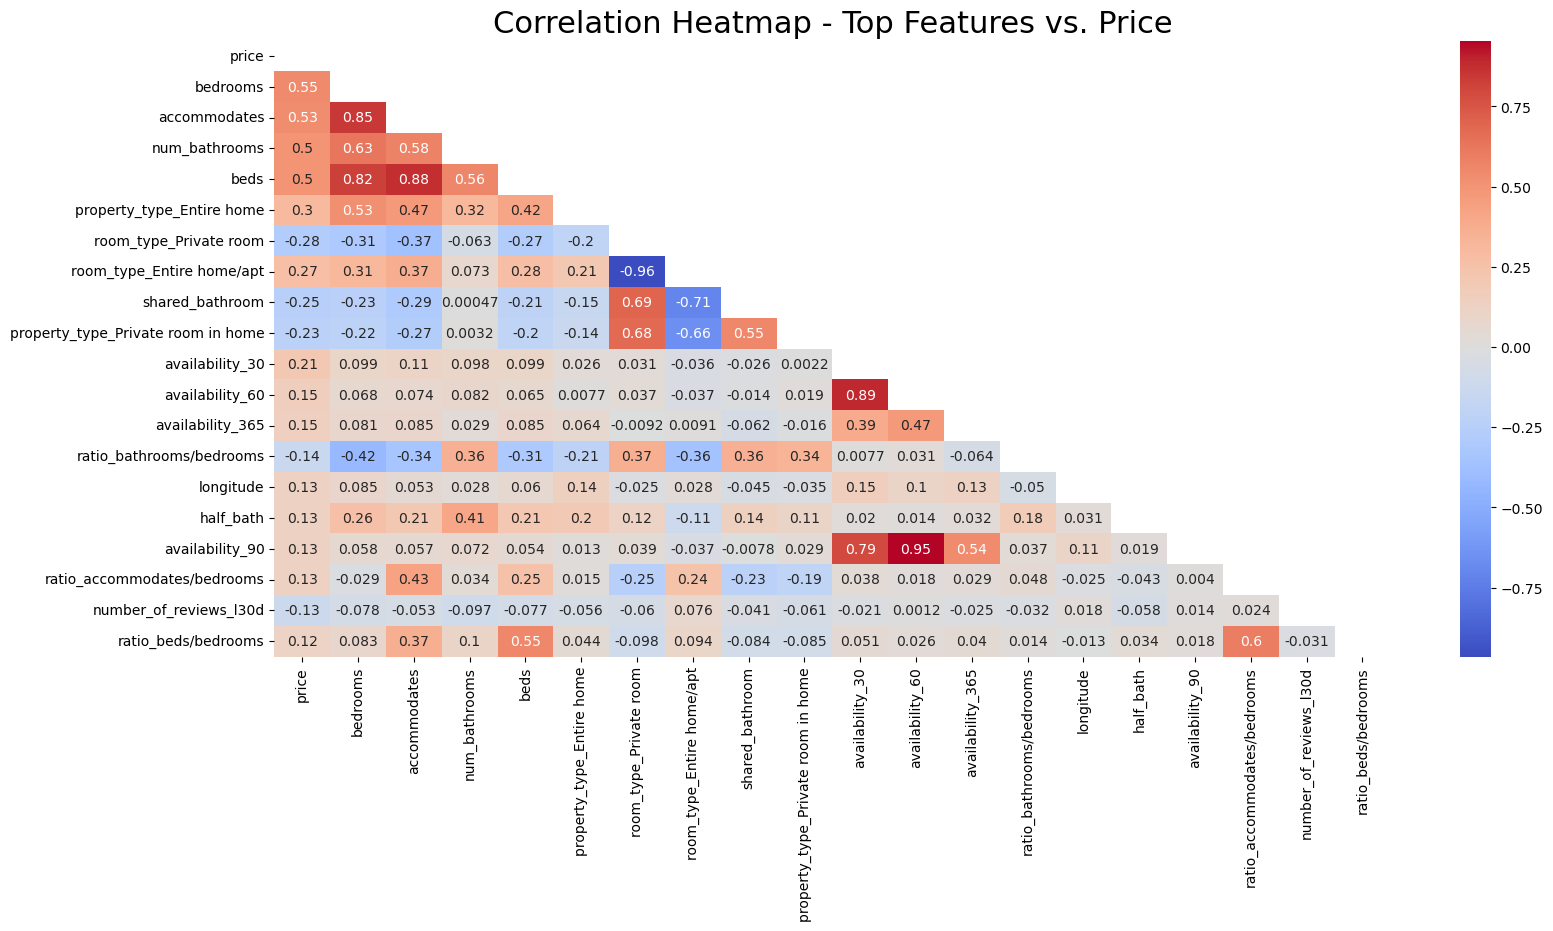

In [49]:
# Calculate the correlations among all variables in the training dataset
cor = Train_Data.corr()
# Filter to only include the correlations against 'price'
price_correl = cor['price']

# Sort the absolute correlations in descending order
high_price_correl = abs(price_correl).sort_values(ascending=False)
# Get the 20 features with highest absolute correlations against 'price'
top_features = high_price_correl.head(20)
heatmap_data = Train_Data[top_features.index]

# Calculate the correlations between the selected features and 'price'
heatmap_data_correlations = heatmap_data.corr()
# Define a figure size
plt.figure(figsize=(18, 8))
# Plot the correlations on a heatmap
sns.heatmap(heatmap_data_correlations, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(heatmap_data_correlations)))
# Set chart title
plt.title('Correlation Heatmap - Top Features vs. Price', fontsize=22)
plt.show()

Based on the generated pairplot, we can confirm our previous statements about the relationships among `price`, `bedrooms`, `beds`, `accommodates` and `num_bathrooms`. No obvious linear relationship can be observed in the scatterplots against `price` as there are a lot of noises. We can notice there are some extremely expensive listings that can accommodate many people or have many bathrooms. However, generally, the price does not increase significantly as these features increase. There are still some listings with relatively high prices as well.

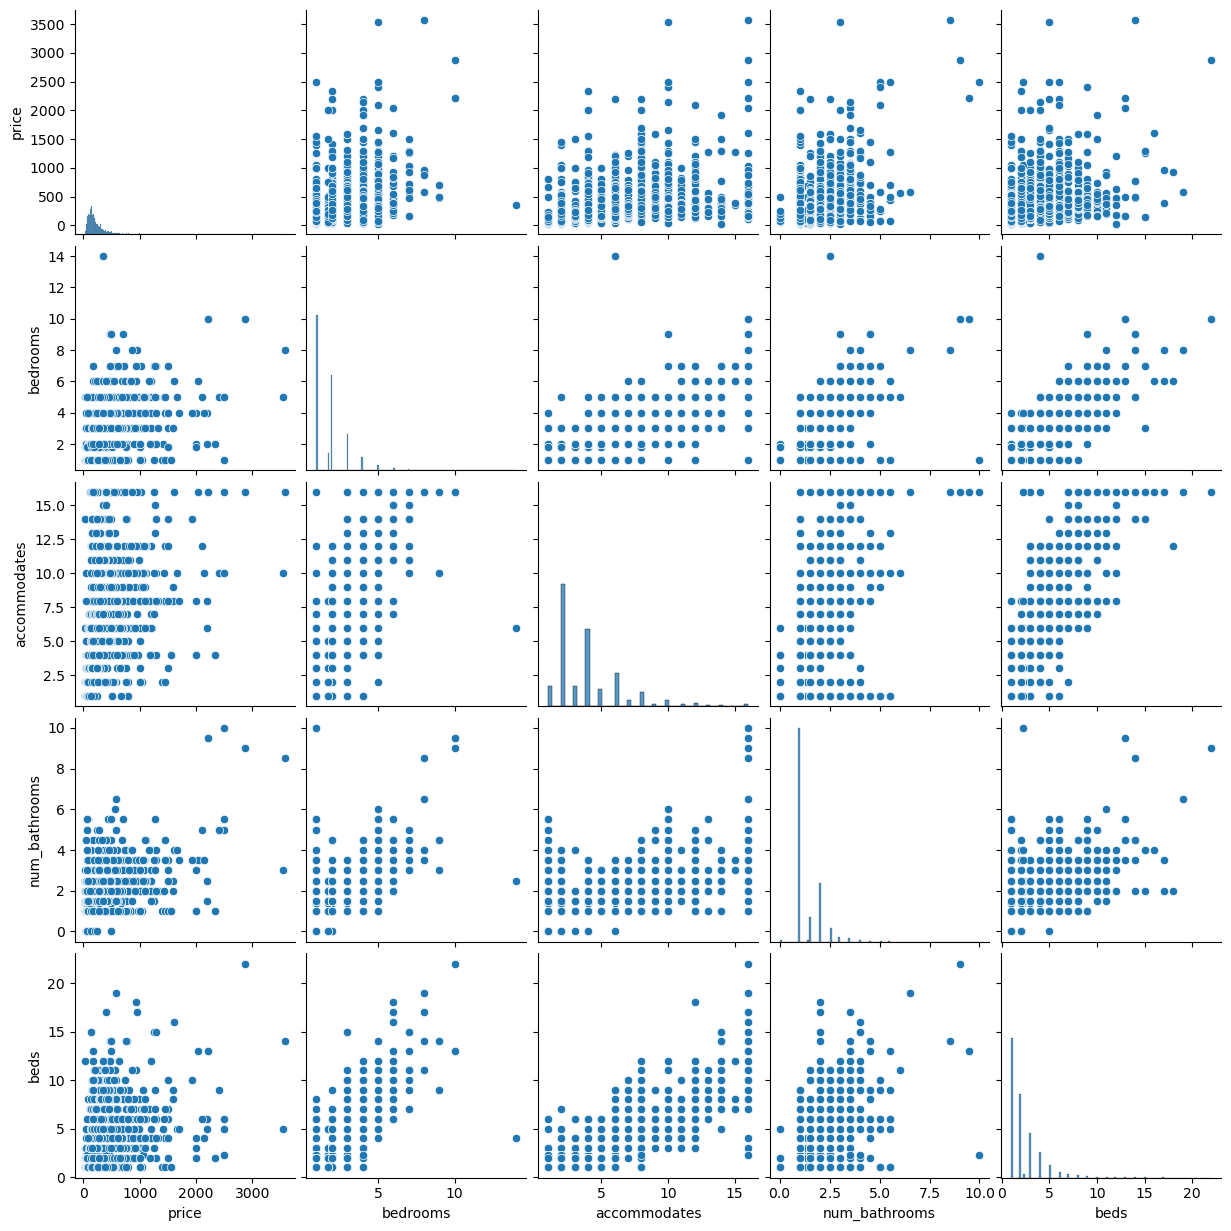

In [50]:
sns.pairplot(Train_Data[['price', 'bedrooms', 'accommodates', 'num_bathrooms', 'beds']])
plt.show()

### `price` and review scores

Below is a pairplot between `price` and different review scores. Based on the scatterplots between `price` and different categories of review scores, we can affirm that the distribution of review scores are left-skewed and that there is no linear relationship between the variables. However, there can be non-linear relationships between them and review scores may still be useful variables in predicting listing price. Multicollinearity is also present as there seems to be linear trends between review scores.

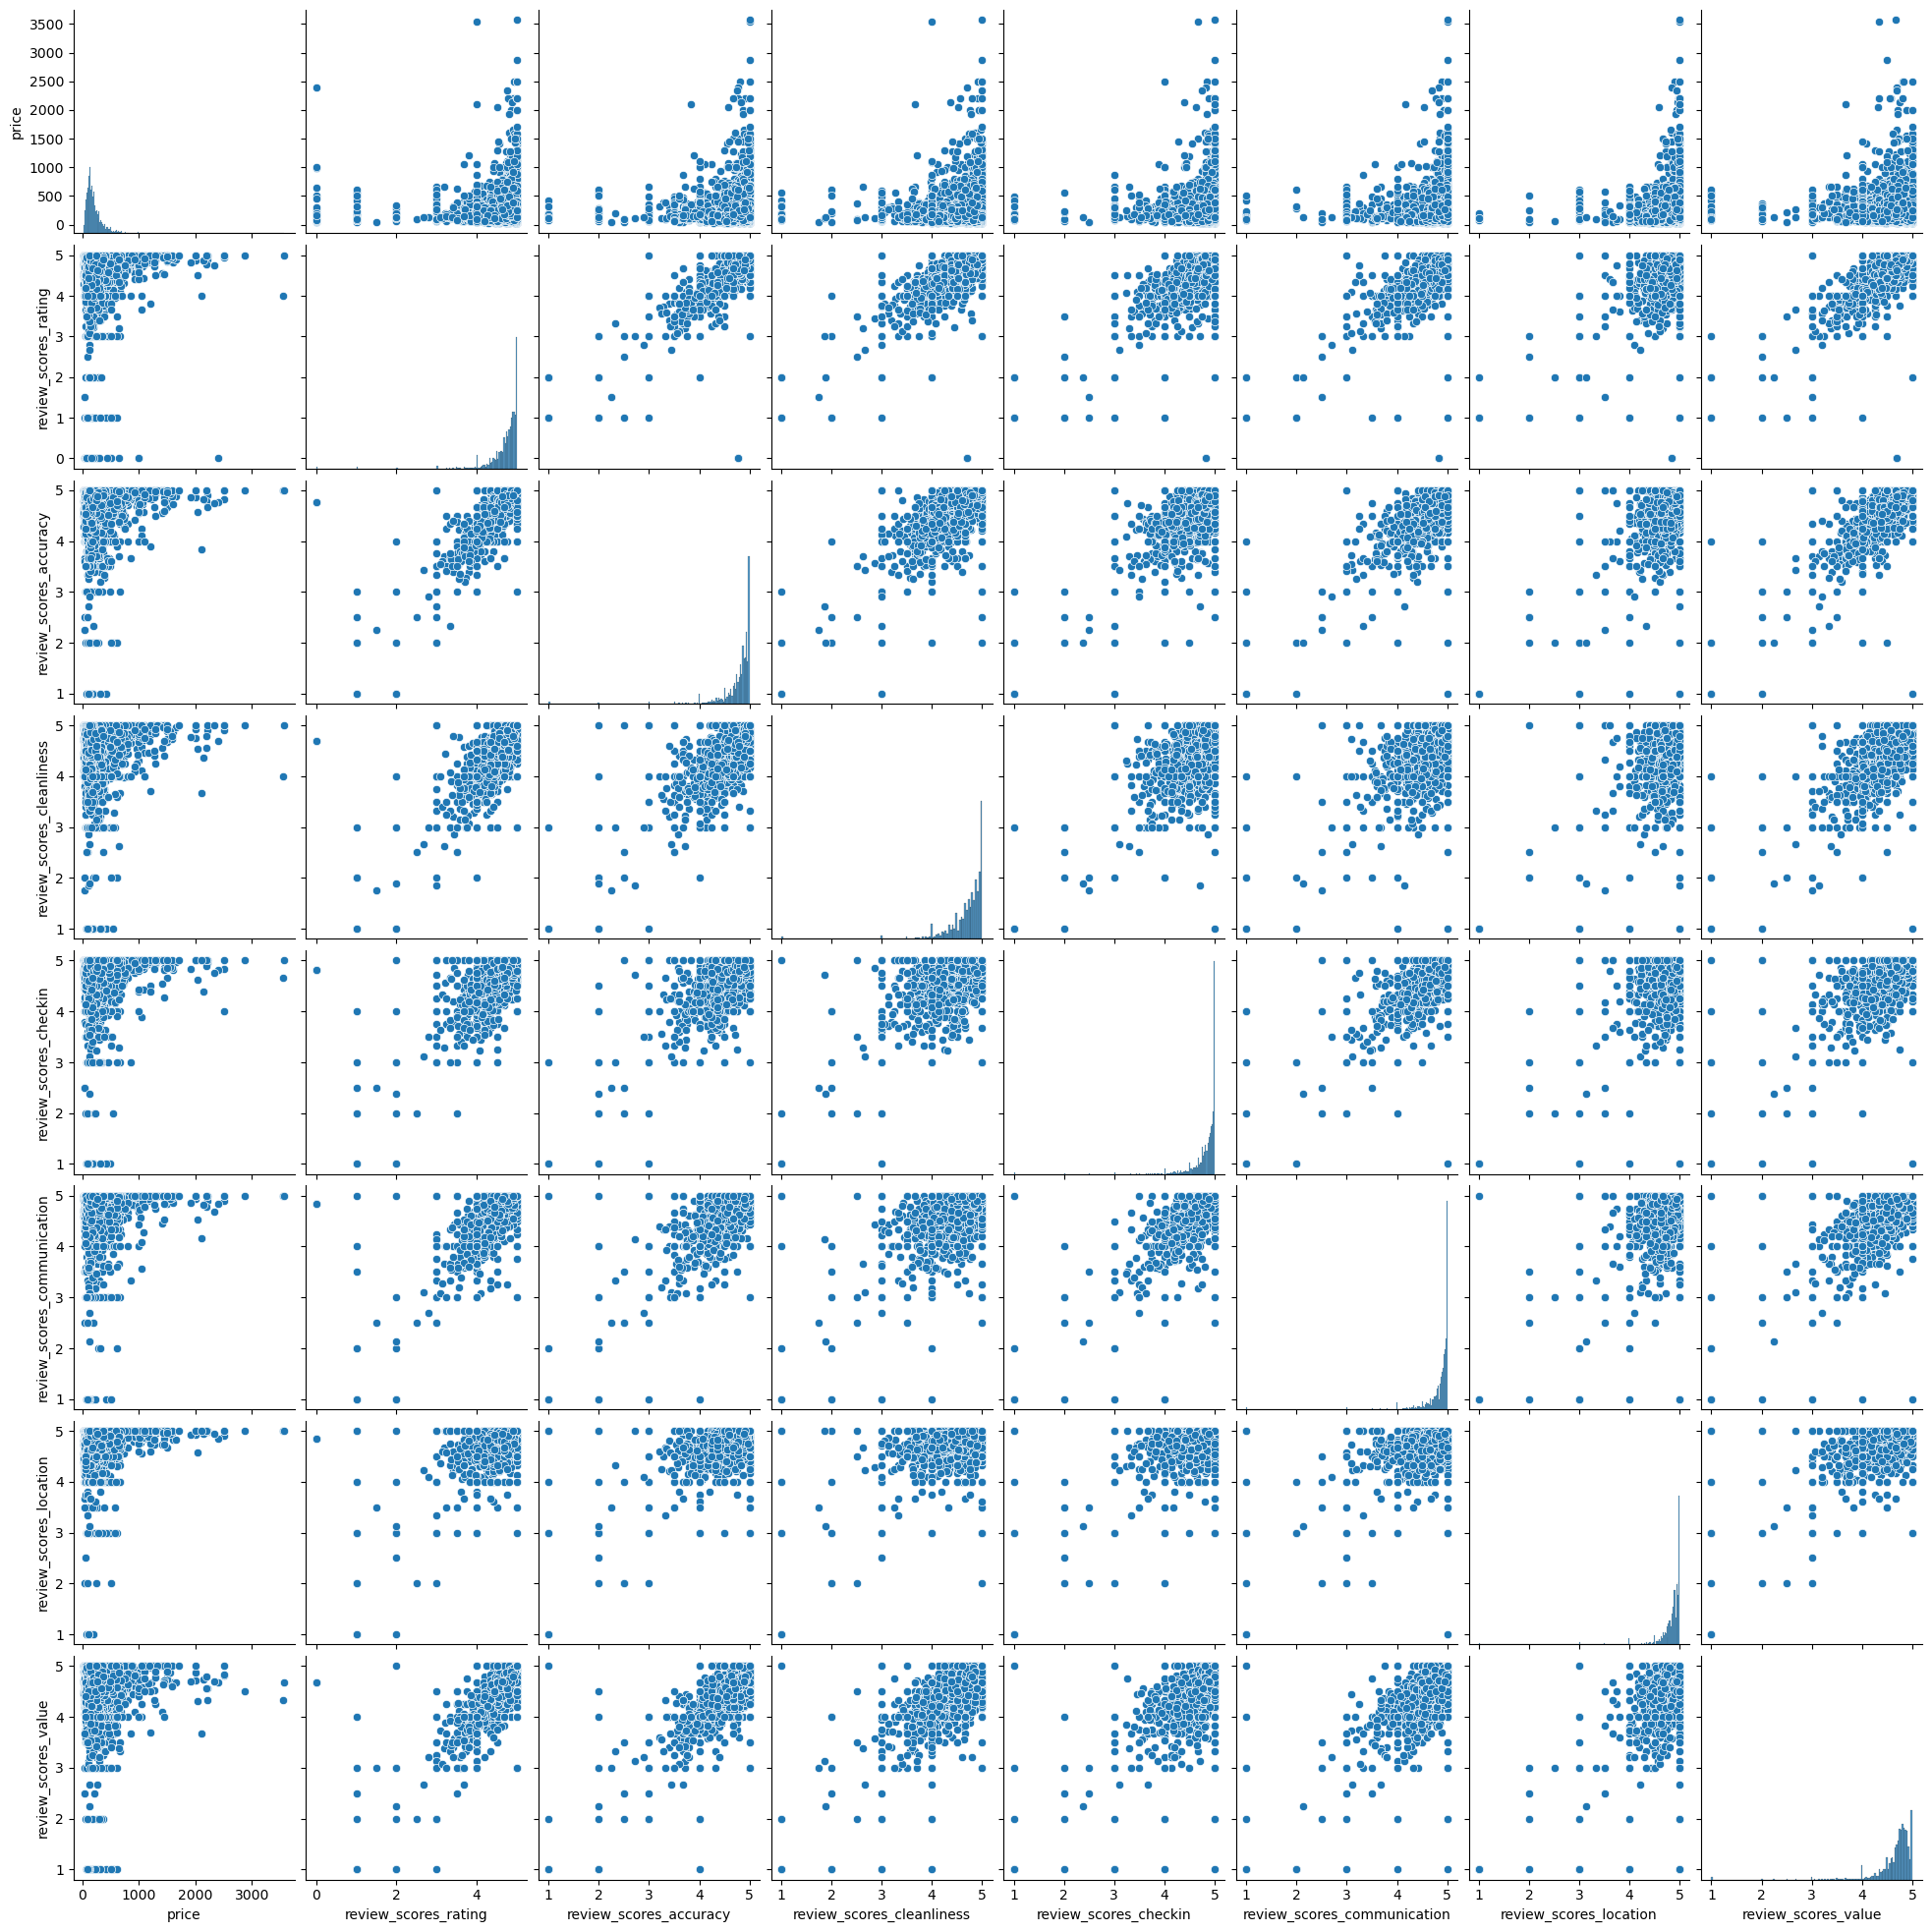

In [51]:
sns.pairplot(Train_Data[['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']])
plt.show()

### `price` and the number of reviews

Once again, a pairplot is generated. The pairplot below shows the relationship between `price` and `number_of_reviews` and `reviews_per_month`. According to the scatterplots between the variables, there is no linear relationship between `price` and `number_of_reviews` and `reviews_per_month`. Nevertheless, there seems to be a non-linear relationship between them. From the graph, we can observe that the variability of prices decreases as the number of reviews increases. The price seems to dip at about 100-200 reviews, and then increases slightly and slowly as the number of reviews increases. This may stem from the fact that having more reviews help the consumer (renter) have a better understanding of the property so they are more willing to pay similar prices, resulting in the reduced variability in listing price.

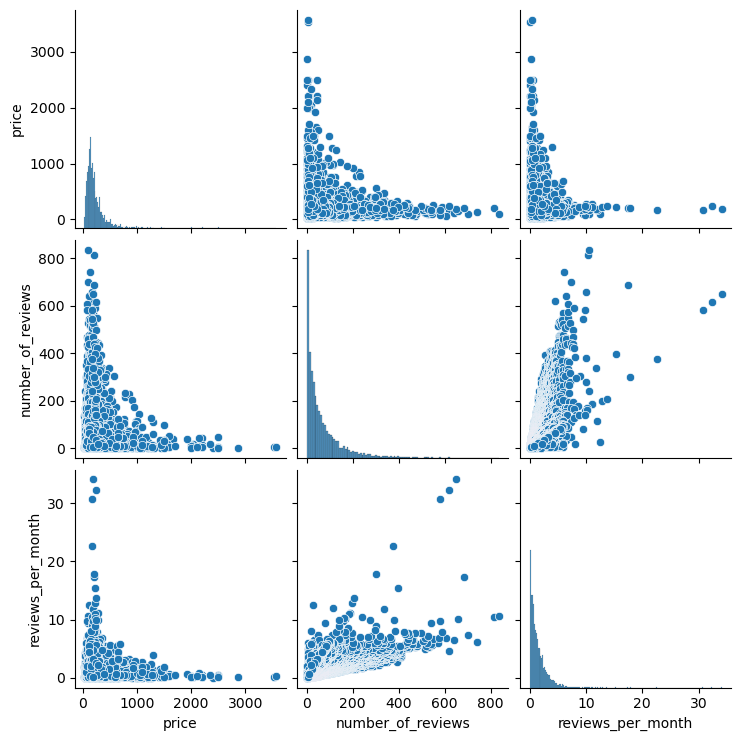

In [52]:
sns.pairplot(Train_Data[['price', 'number_of_reviews', 'reviews_per_month']])
plt.show()

### `price` and features with multiple categories

We create 3 boxplots between `price` and 3 other features - `property_type`, `room_type` and `neighbourhood` to investigate prices of listings in different categories.

In the first boxplot of `property_type` vs. `price`, it can easily be seen that private rooms in home would have the lowest price based on the median and the spread of prices in this category, much lower than other property types. Entire guesthouses, entire rental units and other types of property have approximately the same price. Entire home and entire serviced apartment have around the same median price, despite much larger variance in the price of entire homes. Overall, property types may have a moderate impact on listing prices.

In the second boxplot between `room_type` and `price`, private rooms and share rooms have approximately the same price. Hotel rooms are the most expensive type of room, followed by entire home/apt. Overall, we can see the differences in price among different room types, so this may be a useful feature when predicting listing prices.

In the third boxplot of `neighbourhood` vs. `price`, the prices for different neighbourhoods are roughly the same based on the median and spread of the prices. Carlton has the lowest median price as well as the smallest spread; however, it is not significantly different from those in other categories. We can roughly assume at this stage that neighbourhoods do not significantly affect prices of the listings.

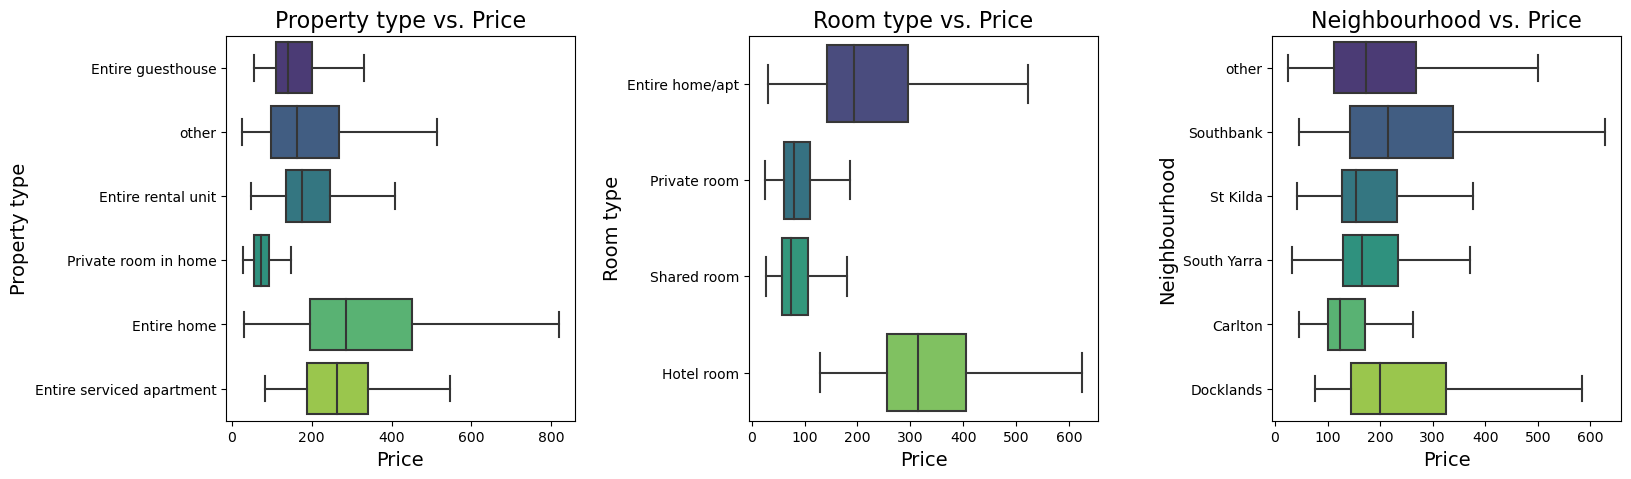

In [53]:
# Create 3 subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

## In the first subplot, create a boxplot with 'property_type' and 'price'
sns.boxplot(data=Train_Data, x='price', y='property_type', ax=axes[0], orient='h', showfliers=False, palette='viridis')
# Set chart title and axis titles
axes[0].set_ylabel('Property type', fontsize=14)
axes[0].set_xlabel('Price', fontsize=14)
axes[0].set_title('Property type vs. Price', fontsize=16)

## In the second subplot, create a boxplot with 'room_type' and 'price'
sns.boxplot(data=Train_Data, x='price', y='room_type', ax=axes[1], orient='h', showfliers=False, palette='viridis')
# Set chart title and axis titles
axes[1].set_ylabel('Room type', fontsize=14)
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_title('Room type vs. Price', fontsize=16)

## In the 3rd subplot, create a boxplot with 'neighbourhood' and 'price'
sns.boxplot(data=Train_Data, x='price', y='neighbourhood', ax=axes[2], orient='h', showfliers=False, palette='viridis')
# Set chart title and axis titles
axes[2].set_ylabel('Neighbourhood', fontsize=14)
axes[2].set_xlabel('Price', fontsize=14)
axes[2].set_title('Neighbourhood vs. Price', fontsize=16)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.35, wspace=0.5)

plt.show()

### `price` and types of bathroom

We create 2 boxplots to investigate the relationship between `price` and `half_bath`, as well as between `price` and `shared_bathroom` to initially explore the impact of those features in predicting the target variable `price`.

In the first boxplot of `half_bath` and `price`, even though the median prices are roughly the same between listings with half-baths and listings without half-baths, the variability of the price is almost double for listings with half-baths. This may imply that listings with half-baths may be more likely to be more expensive and `half_bath` might be a useful feature when predicting the listing price.

In the second boxplot, differences can be seen quite easily. Listings with shared bathrooms have much lower prices, judging based on both the lower median as well as the lower variance. `shared_bathroom` might be useful in predicting listing prices.

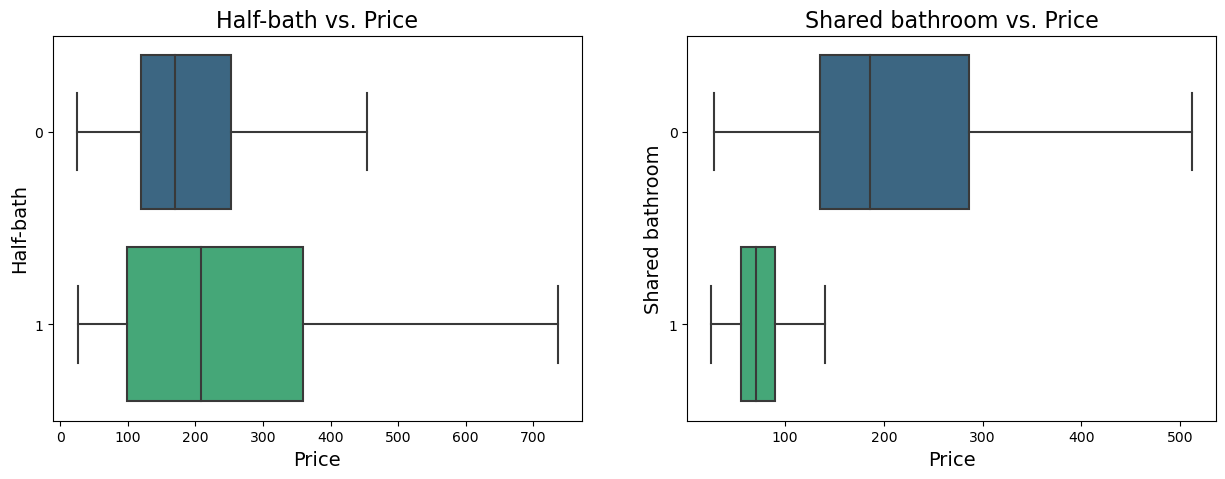

In [54]:
# Create 3 subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

## In the first subplot, create a boxplot with 'property_type' and 'price'
sns.boxplot(data=Train_Data, x='price', y='half_bath', ax=axes[0], orient='h', showfliers=False, palette='viridis')
# Set chart title and axis titles
axes[0].set_ylabel('Half-bath', fontsize=14)
axes[0].set_xlabel('Price', fontsize=14)
axes[0].set_title('Half-bath vs. Price', fontsize=16)

## In the second subplot, create a boxplot with 'room_type' and 'price'
sns.boxplot(data=Train_Data, x='price', y='shared_bathroom', ax=axes[1], orient='h', showfliers=False, palette='viridis')
# Set chart title and axis titles
axes[1].set_ylabel('Shared bathroom', fontsize=14)
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_title('Shared bathroom vs. Price', fontsize=16)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.35, wspace=0.2)

plt.show()

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [55]:
# Eliminate categorial variables and irrelevant features before training models.
Train_Data.drop(['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type'], axis=1, inplace=True)
Test_Data.drop(['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type'], axis=1, inplace=True)

In [56]:
# Drop the dependent variable 'price'.
X_train = Train_Data.drop('price', axis=1).values
X_test = Test_Data.drop(['price', 'ID'], axis=1).values
y_train = Train_Data['price']

In [57]:
# Import regression models
from sklearn.ensemble import RandomForestRegressor
# pip install xgboost
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Import StandardScaler, SelectFromModel, and GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Import assessment metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Random Forest Regression

Based on the exploratory data analysis conducted in Task 2, the top four features representing the greatest absolute correlation against price are `bedrooms`, `accommodates`, `num_bathrooms`, `beds`. Indeed, these features are listed in the printed output determined by feature importances after fitting `RandomForestRegressor` and setting a threshold of 0.02 in the `SelectFromModel` to choose the optimal number of features that give the smallest RMSE when predicting price on the test dataset.

In [58]:
# Select feature's names from the Train_Data.
feat_labels = Train_Data.drop('price', axis=1).columns[1:]

# Create an instance of the RandomForestRegressor.
forest = RandomForestRegressor(n_estimators = 1000, random_state = 1)

# Fit the data with RandomForestRegresor.
forest.fit(X_train, y_train)

# Calculate the score of features having effect on the model.
importances = forest.feature_importances_

# Sort the index of importances from largest to smallest.
indices = np.argsort(importances)[::-1]

# Select importances of features that are greater than 0.02.
sfm = SelectFromModel(forest, threshold=0.02, prefit=True)
X_selected = sfm.transform(X_train)

# Print positions in indices.
print('Number of train features that meet this threshold criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print(f'{f + 1:2}) {feat_labels[indices[f]]:40} {importances[indices[f]]:10}')

Number of train features that meet this threshold criterion: 9
 1) beds                                     0.2138250960605636
 2) half_bath                                0.1485401178948661
 3) bedrooms                                 0.054410958954331505
 4) review_scores_value                      0.034299681420290294
 5) availability_60                          0.03172530019595966
 6) accommodates                             0.030755518926930975
 7) amenities_other                          0.024412912670345142
 8) number_of_reviews                        0.021781316537347037
 9) num_bathrooms                            0.020033031842830305


The greater the score, the more important the features to the model. Nine features whose importances’ score was higher than 0.02 were chosen for X_train and X_test.

In [59]:
# Adjust X_train and X_test to the top nine features importances above.
X_train = Train_Data[['beds', 'half_bath', 'bedrooms', 'review_scores_value', 'availability_60', 'accommodates',
                      'amenities_other', 'number_of_reviews', 'num_bathrooms']]
X_test = Test_Data[['beds', 'half_bath', 'bedrooms', 'review_scores_value', 'availability_60', 'accommodates',
                      'amenities_other', 'number_of_reviews', 'num_bathrooms']]

Hyperparameters of the RandomForestRegressor were tuned via `GridSearchCV`.
1. `max_depth`: the maximum depth of splitting trees.
2. `max_features`: the number of features when conducting the best split.
3. `n_estimators`: the number of decision trees in the forest.

`scoring` = `neg_root_mean_squared_error` is used to assess the performance of a regression model. Since the default scoring of `sklearn` considers higher metrics to demonstrate better model performance, we are using negative RMSE instead of RMSE. A higher negative value of the RMSE depicts better model performance as the RMSE will then be lower. For example, if the negative RMSE is higher (-1000 > -2000), the RMSE is lower (1000 < 2000).


In [60]:
# Tune hyperparameters via cross-validation for the RandomForestRegressor.
param_grid = {'max_depth': [20, 50, 100],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [100, 500, 1000]}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(forest, scoring = 'neg_root_mean_squared_error', param_grid=param_grid, cv = 5)

# Fit the specific hyperparameters to the training data.
grid_search.fit(X_train, y_train)

# Show the best parameters
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [61]:
# Apply the best hyperparameters of Random Forest Regressor.
forest = RandomForestRegressor(n_estimators=500,
                               criterion='squared_error',
                               max_depth = 20,
                               max_features = 'sqrt',
                               random_state=42)

# Fit the model with best hyperparameters
forest.fit(X_train, y_train)

# Predict the target variable 'price'
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Print the assessment metrics
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}')

MSE train: 4308.783
R^2 train: 0.902


In [62]:
# Create the column 'price' in the Test_Data.
Test_Data['price'] = y_test_pred

# Adjust the format to submit on Kaggle.
price_data = Test_Data[['ID', 'price']]
price_data

# Save the output in the csv file.
price_data.to_csv('pred_forest.csv', index = False)

### Extreme Gradient Boosting Regression (XGBoost Regression)

In [63]:
# Create an instance of the XGBRegressor
xgb_reg = XGBRegressor(random_state=42)

# Fit the data with XGBRegressor
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Hyperparameters of the XGBRegressor were tuned via `GridSearchCV`.
1. max_depth: the maximum depth of each tree.
2. n_estimators: the number of trees in the ensemble.
3. eta: the learning rate to measure the model’s weight.


In [64]:
# Tune hyperparameters via cross-validation for the XGBRegressor.
param_grid = {'max_depth':    [3, 4, 5],
              'n_estimators': [300, 400, 500],
              'eta': [0.001, 0.01, 0.1]}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(xgb_reg, scoring = 'neg_root_mean_squared_error', param_grid=param_grid, cv=5)

# Fit the specific hyperparameters to the training data.
grid_search.fit(X_train, y_train)

# Show the best parameters
best_params = grid_search.best_params_
best_params

{'eta': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [65]:
# Apply the best hyperparameters of XGBoost Regressor.
xgb_reg = XGBRegressor(eta = 0.01,
                       max_depth = 3,
                       n_estimators = 500,
                       random_state=42)

# Fit the model with the best hyperparameters.
xgb_reg.fit(X_train, y_train)

# Predict the target variable 'price'.
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

# Print the assessment metrics.
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}')

MSE train: 20819.406
R^2 train: 0.526


In [66]:
# Create price column in the Test_Data.
Test_Data['price'] = y_test_pred

# Adjust the format to submit on Kaggle.
price_data = Test_Data[['ID', 'price']]
price_data

# Save the output in the csv file.
price_data.to_csv('pred_XGB.csv', index = False)

### Multi-layer Perceptron Regressor (MLPRegressor)

In [67]:
# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [68]:
# Create an instance of the MLPRegressor
mlp = MLPRegressor(random_state=42)

# Fit MLPRegressor to the data
mlp.fit(X_train_scaled, y_train)

MLPRegressor(random_state=42)

Hyperparameters of the MLPRegressor were tuned via `GridSearchCV`.
1. hidden_layer_sizes: the number of neurons in the ith hidden layer.
2. activation: activation function for the hidden layer.
3. solver: the solver for weight optimization.
4. alpha: the L2 regularization’s strength.
5. learning_rate: to measure the weight updates.


In [69]:
# Tune hyperparameters via cross-validation for the MLPRegressor.
param_grid = {'hidden_layer_sizes': [(50,100,50),(100,100)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.015],
              'learning_rate': ['constant','adaptive']}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(mlp, scoring='neg_root_mean_squared_error', param_grid=param_grid, cv=5, verbose=3, n_jobs=-1) 

# Fit the specific hyperparameters to the training data.
grid_search.fit(X_train_scaled, y_train)

# Show the best parameters
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [70]:
# Apply the best hyperparameters of MLP Regressor.
mlp_reg = MLPRegressor(hidden_layer_sizes = (50,100,50), 
                       alpha = 0.001, 
                       activation = 'relu', 
                       solver = 'adam', 
                       learning_rate = 'constant',
                       random_state=42)

# Fit the model with the best hyperparameters.
mlp_reg.fit(X_train_scaled, y_train)

# Predict the target variable 'price'.
y_train_pred = mlp_reg.predict(X_train_scaled)
y_test_pred = mlp_reg.predict(X_test_scaled)

# Print the assessment metrics.
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}')

MSE train: 20664.846
R^2 train: 0.529


In [71]:
# Create the column 'price' in the Test_Data.
Test_Data['price'] = y_test_pred

# Adjust the format to submit on Kaggle.
price_data = Test_Data[['ID', 'price']]
price_data

# Save the output in the csv file.
price_data.to_csv('predictions_MLP_num_bath(4).csv', index=False)

The achieved RMSE is **3418.63878** from Kaggle. This is the smallest RMSE that we have got after 121 trials and the model that performs the best in predicting the Melbourne Airbnb listed prices is the MLPRegressor.